In [1]:
import pandas as pd
from carga_datos import  columnas_ndvi
import matplotlib.pyplot as plt
import numpy as np
import ftfy
import geopandas as gpd
import json

green_spaces_data cargada


# Datos NDVI

Cargar BDD de NDVI

In [2]:
df_summer = pd.read_csv("green_spaces_data/summerNDVI_corregido.csv",  encoding='utf-8')
df_winter = pd.read_csv("green_spaces_data/winterNDVI_corregido.csv",  encoding='utf-8')

Seleccionar Region de Vaplaraíso

In [3]:
df_summer_valparaiso = df_summer.loc[df_summer["NOM_REG"] == "Valparaíso"]
df_winter_valparaiso = df_winter.loc[df_winter["NOM_REG"] == "Valparaíso"]

Ordenamos columnas de NDVI por orden cronológico

In [4]:
def extraer_numero(columna):
    return int(columna.split('_')[0])

# Ordenamos las columnas
ordered_ndvi_columns = sorted(columnas_ndvi, key=extraer_numero)

# Summer
# Reorganizamos las columnas, primero las ordenadas NDVI y luego el resto de las columnas
df_summer_valparaiso = df_summer_valparaiso[ordered_ndvi_columns + [col for col in df_summer_valparaiso.columns if '_NDVI' not in col]]

# Winter
df_winter_valparaiso = df_winter_valparaiso[ordered_ndvi_columns + [col for col in df_winter_valparaiso.columns if '_NDVI' not in col]]


Creamos copias

In [5]:
df_summer_valparaiso_copy = df_summer_valparaiso.copy()
df_winter_valparaiso_copy =df_winter_valparaiso.copy()

Agregar columnas con valor minimo y máximo histórico y NDVI promedio

In [6]:
# Verano
df_summer_valparaiso_copy['MIN'] = df_summer_valparaiso_copy[columnas_ndvi].min(axis=1) # mínimo
df_summer_valparaiso_copy['MAX'] = df_summer_valparaiso_copy[columnas_ndvi].max(axis=1) # máximo
df_summer_valparaiso_copy['MEAN'] = df_summer_valparaiso_copy[columnas_ndvi].mean(axis=1) # promedio

df_winter_valparaiso_copy['MIN'] = df_winter_valparaiso_copy[columnas_ndvi].min(axis=1) # mínimo
df_winter_valparaiso_copy['MAX'] = df_winter_valparaiso_copy[columnas_ndvi].max(axis=1) # máximo
df_winter_valparaiso_copy['MEAN'] = df_winter_valparaiso_copy[columnas_ndvi].mean(axis=1) # promedio

# Tablas con minimo, maximos y promedio de todas las comunas

## Verano

In [7]:
pd.set_option('display.max_rows', None)
df_summer_valparaiso_copy[['MIN', 'MAX', 'MEAN']] = df_summer_valparaiso_copy[['MIN', 'MAX', 'MEAN']].round(2)

/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_1716/2410648158.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_summer_valparaiso_tabla = df_summer_valparaiso_tabla.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)


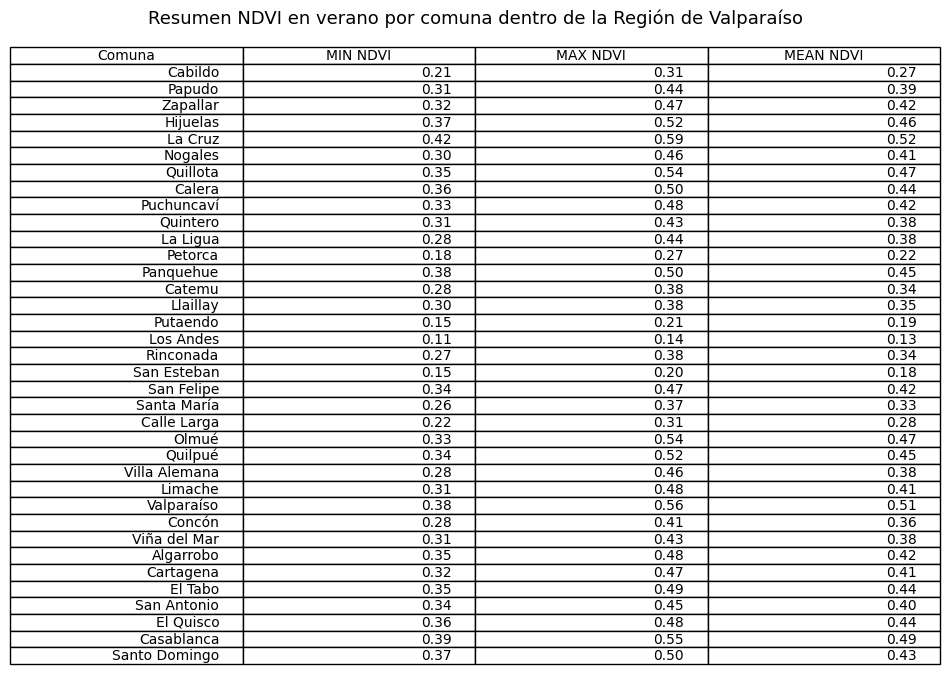

In [8]:
df_summer_valparaiso_tabla = df_summer_valparaiso_copy[['NOM_COM','MIN', 'MAX', 'MEAN']]
df_summer_valparaiso_tabla = df_summer_valparaiso_tabla.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

# Crea la figura
fig, ax = plt.subplots(figsize=(12, 6))

ax.axis('tight')
ax.axis('off')

plt.title('Resumen NDVI en verano por comuna dentro de la Región de Valparaíso', fontsize=13, y=1.2)

tabla = ax.table(cellText=df_summer_valparaiso_tabla.values, colLabels=['Comuna', 'MIN NDVI', 'MAX NDVI', 'MEAN NDVI'], loc='center')
plt.show()

## Invierno

In [9]:
pd.set_option('display.max_rows', None)
df_winter_valparaiso_copy[['MIN', 'MAX', 'MEAN']] = df_winter_valparaiso_copy[['MIN', 'MAX', 'MEAN']].round(3)

/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_1716/3576013569.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_winter_valparaiso_tabla = df_winter_valparaiso_tabla.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)


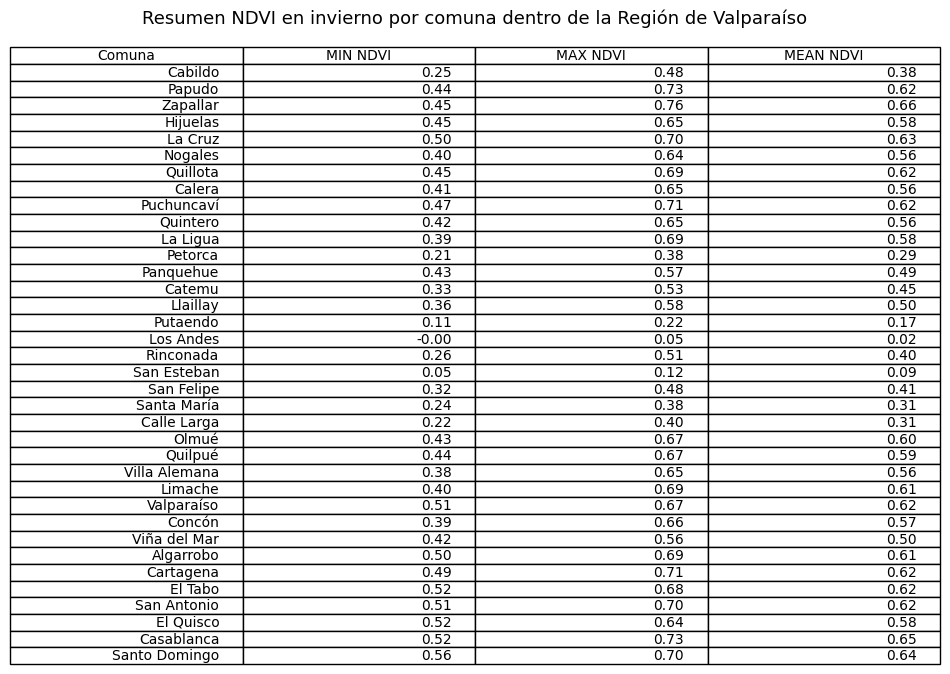

In [10]:
df_winter_valparaiso_tabla = df_winter_valparaiso_copy[['NOM_COM','MIN', 'MAX', 'MEAN']]
df_winter_valparaiso_tabla = df_winter_valparaiso_tabla.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

# Crea la figura
fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño de la imagen

ax.axis('tight')
ax.axis('off')

plt.title('Resumen NDVI en invierno por comuna dentro de la Región de Valparaíso', fontsize=13, y=1.2)

tabla = ax.table(cellText=df_winter_valparaiso_tabla.values, colLabels=['Comuna', 'MIN NDVI', 'MAX NDVI', 'MEAN NDVI'], loc='center')
plt.show()

# Tabla comparativa

/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_1482/1683042139.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_comparado = df_comparado.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)


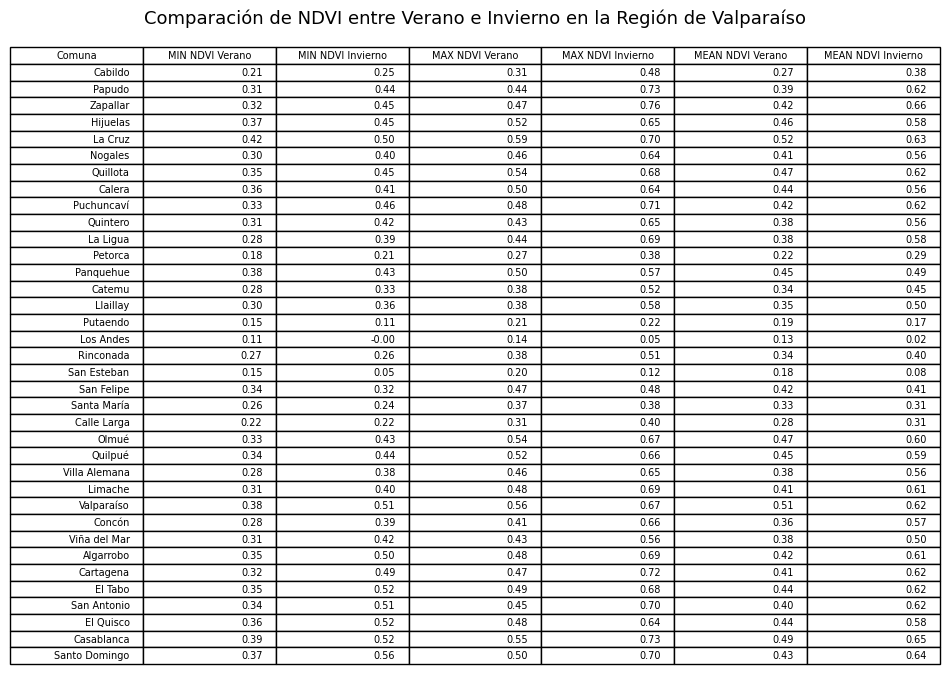

In [11]:
# Crear un DataFrame comparativo
df_comparado = pd.DataFrame({
    'Comuna': df_summer_valparaiso_copy['NOM_COM'],
    'MIN NDVI Verano': df_summer_valparaiso_copy['MIN'],
    'MIN NDVI Invierno': df_winter_valparaiso_copy['MIN'],
    'MAX NDVI Verano': df_summer_valparaiso_copy['MAX'],
    'MAX NDVI Invierno': df_winter_valparaiso_copy['MAX'],
    'MEAN NDVI Verano': df_summer_valparaiso_copy['MEAN'],
    'MEAN NDVI Invierno': df_winter_valparaiso_copy['MEAN']
})

# Redondear a 2 decimales
df_comparado[['MIN NDVI Verano', 'MIN NDVI Invierno', 'MAX NDVI Verano', 'MAX NDVI Invierno', 'MEAN NDVI Verano', 'MEAN NDVI Invierno']] = df_comparado[['MIN NDVI Verano', 'MIN NDVI Invierno', 'MAX NDVI Verano', 'MAX NDVI Invierno', 'MEAN NDVI Verano', 'MEAN NDVI Invierno']].round(2)
df_comparado = df_comparado.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 6))

ax.axis('tight')
ax.axis('off')

plt.title('Comparación de NDVI entre Verano e Invierno en la Región de Valparaíso', fontsize=13, y=1.2)

tabla = ax.table(cellText=df_comparado.values, 
                colLabels=df_comparado.columns, 
                loc='center')

plt.show()

# Mapa coroplético Región de Valparaíso

#### Cambiamos las etiquetas (0_NDVI por 2002_NDVI)
(ya están ordenadas de manera cronológica)

In [11]:
# Diccionario con etiquetas nuevas (reemplaza 0_NDVI con 2002_NDVI)
nueva_etiqueta_ndvi = {
    f"{i}_NDVI": f"{2002 + i}_NDVI" for i in range(21)  # De 0_NDVI (2002) a 20_NDVI (2022)
}

# Cambiamos etiqueta
df_summer_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)
df_winter_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)

fuente sobre como hacer el mapa: https://github.com/Carlos-Olivares/Mapa-Coropletico/blob/main/Mapa_Coropletico.ipynb

Cargar imagen polígono

In [13]:
#Importar poligonos de comunas
shapefile = 'Poligonos//Comunas//comunas.shp'

#Leer shapefile con geopandas
gdf = gpd.read_file(shapefile, encoding='utf-8')[['codregion', 'Region', 'cod_comuna', 'Comuna', 'Provincia', 'geometry']]

#Filtramos solo RM
gdf = gdf[gdf['codregion'] == 5]

#Columnas de interés
gdf = gdf[['cod_comuna', 'Comuna', 'geometry']]

### Verano

In [14]:
# Unir los dos dataframes por el código de la comuna
df_summer_valparaiso_merged = gdf.merge(df_summer_valparaiso_copy, how='left', left_on='cod_comuna', right_on='COD_COMUNA')

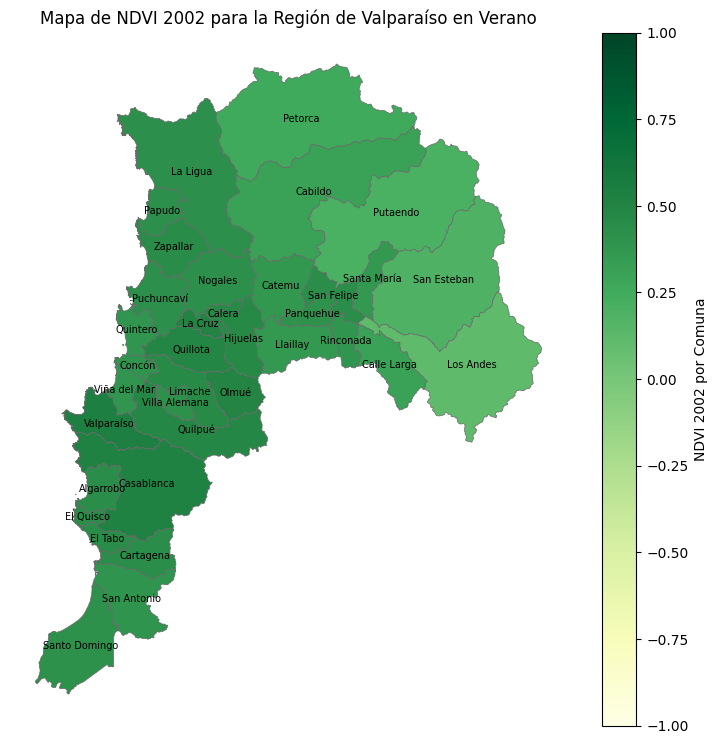

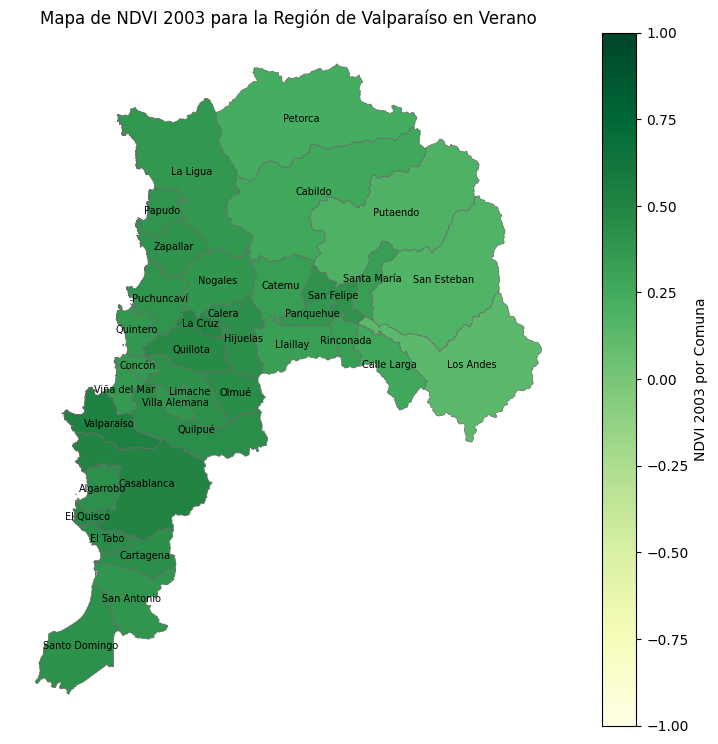

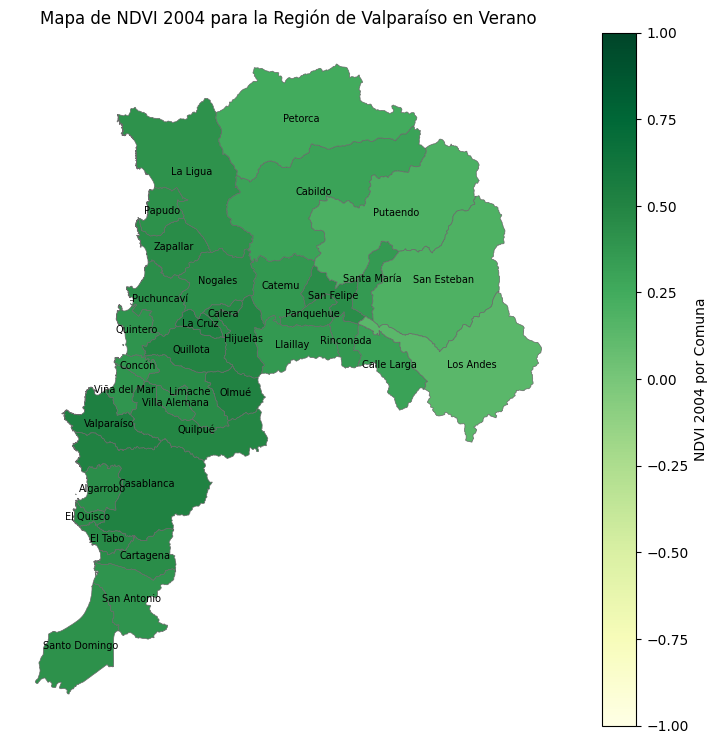

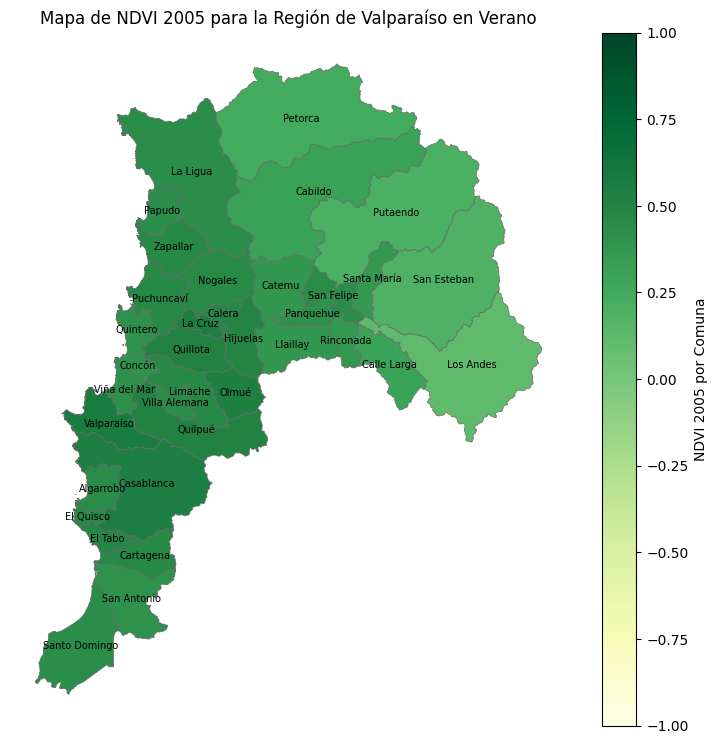

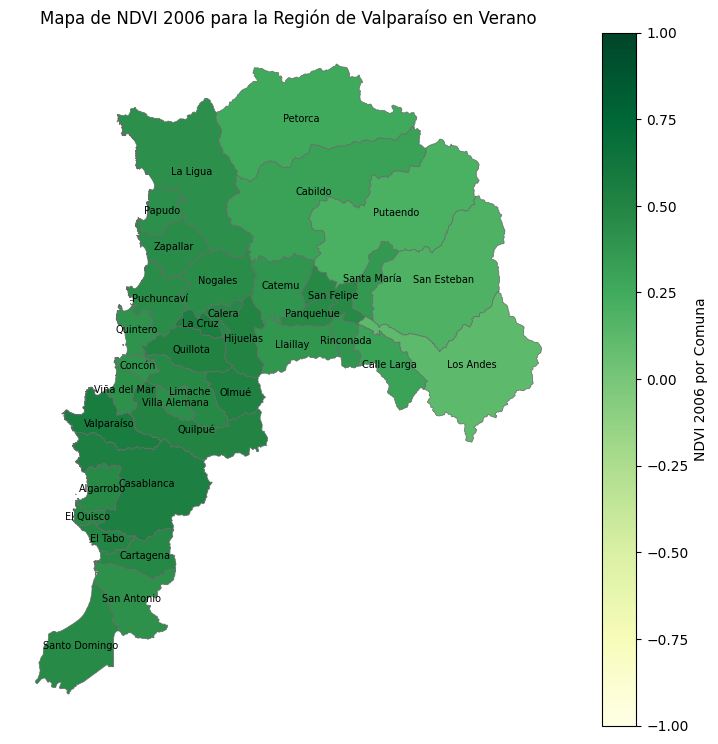

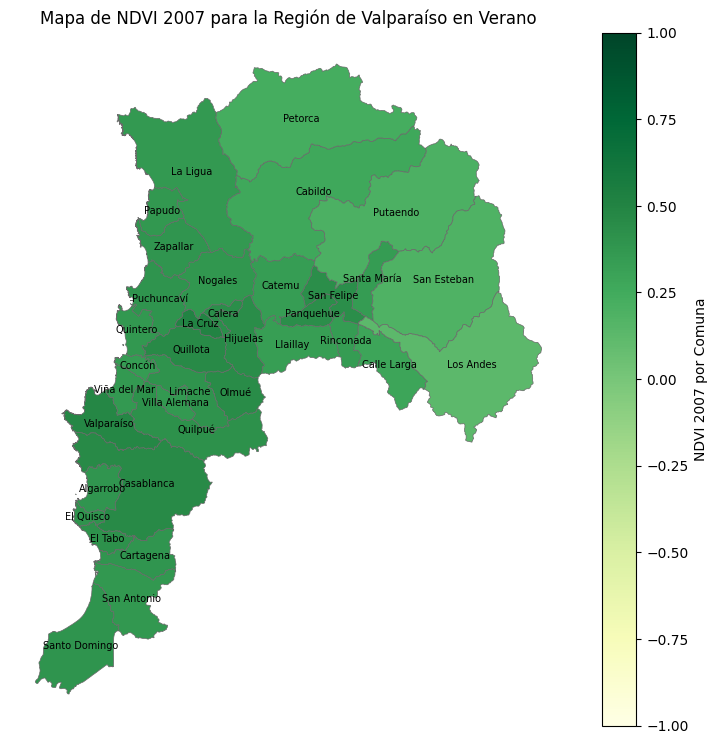

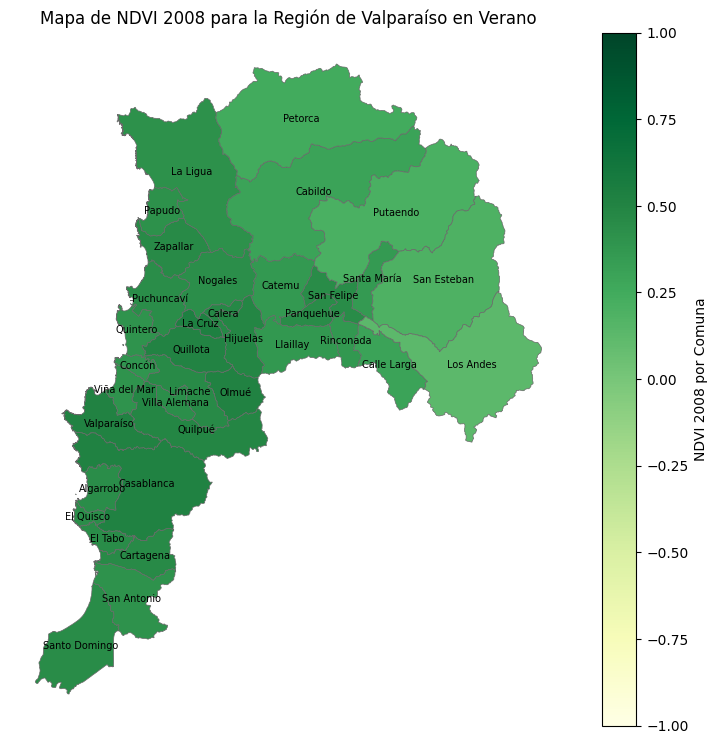

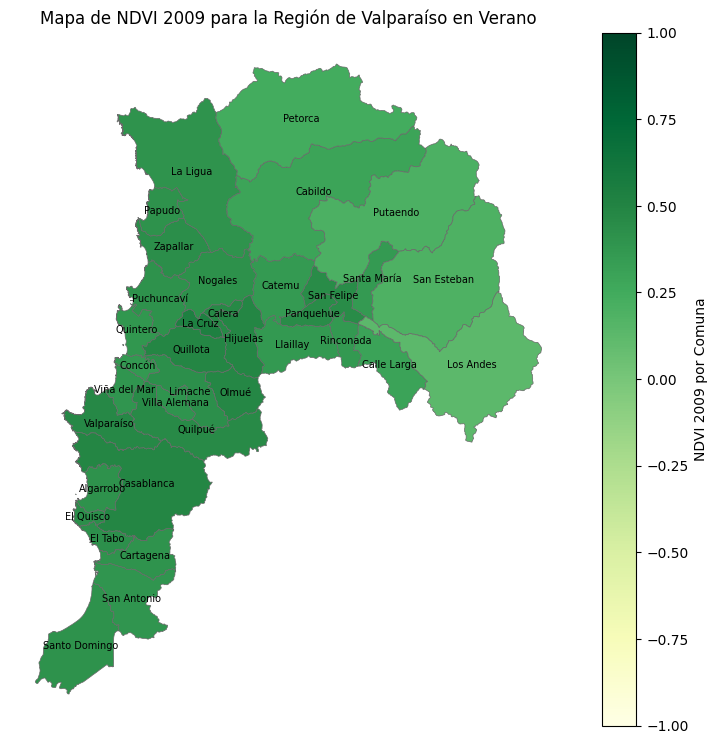

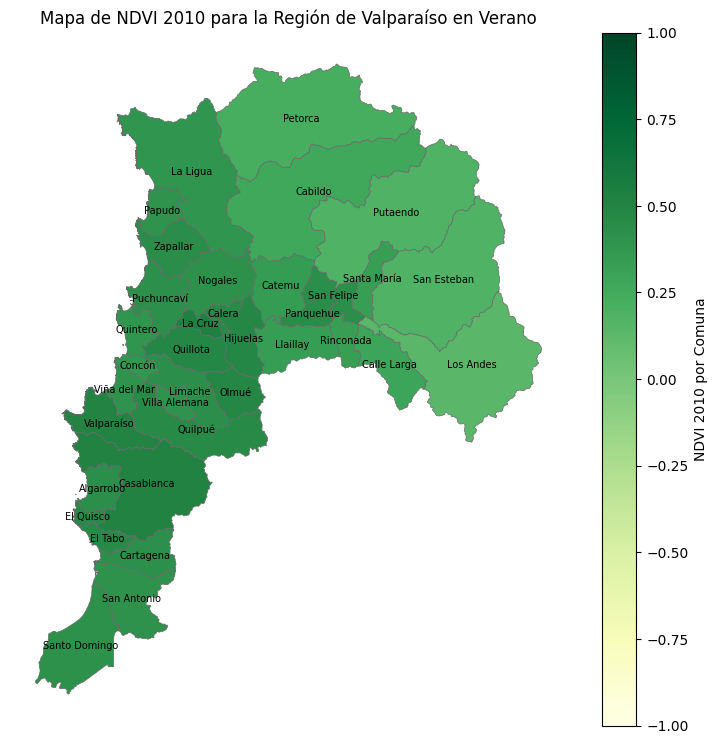

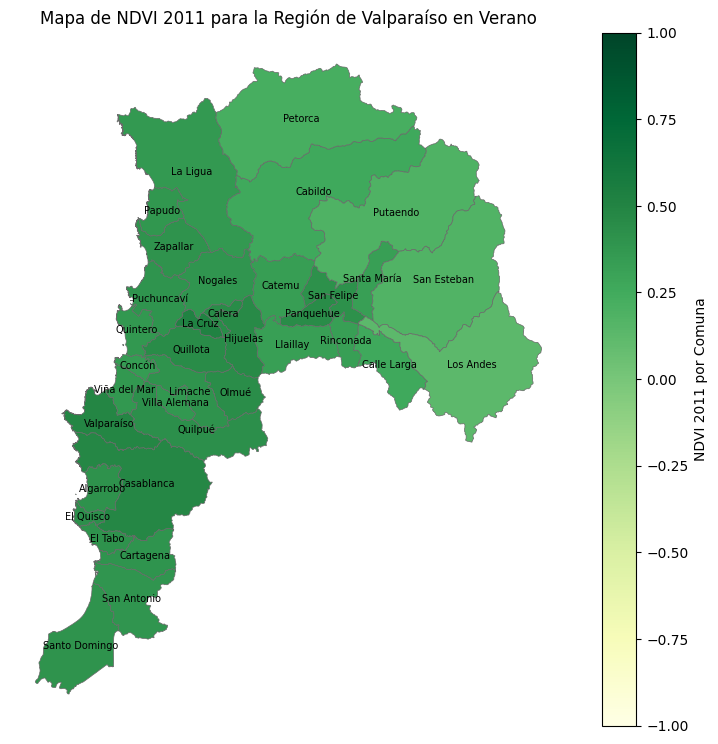

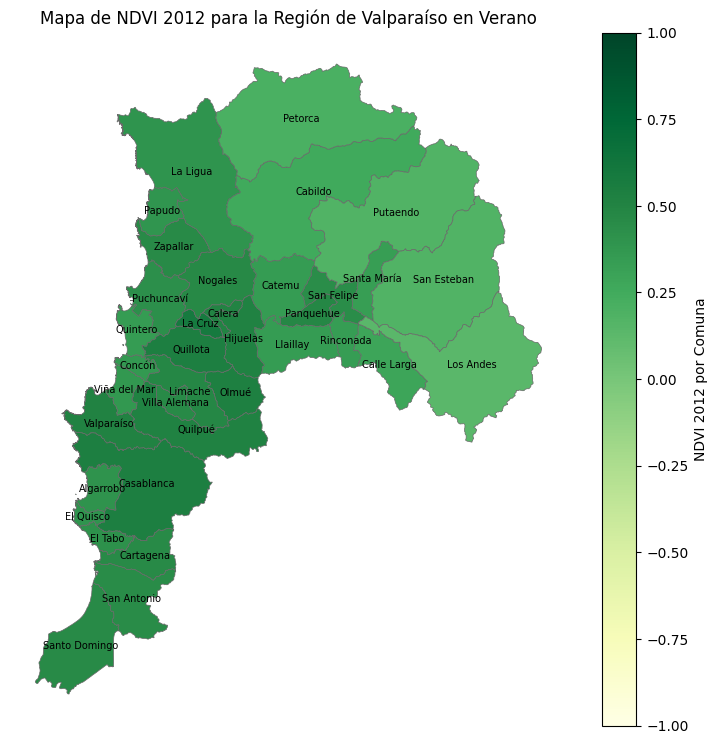

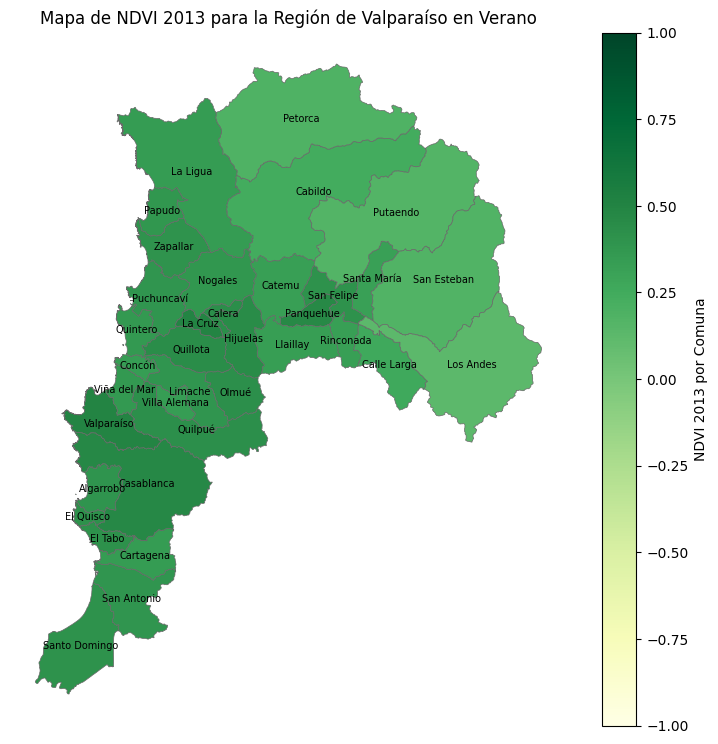

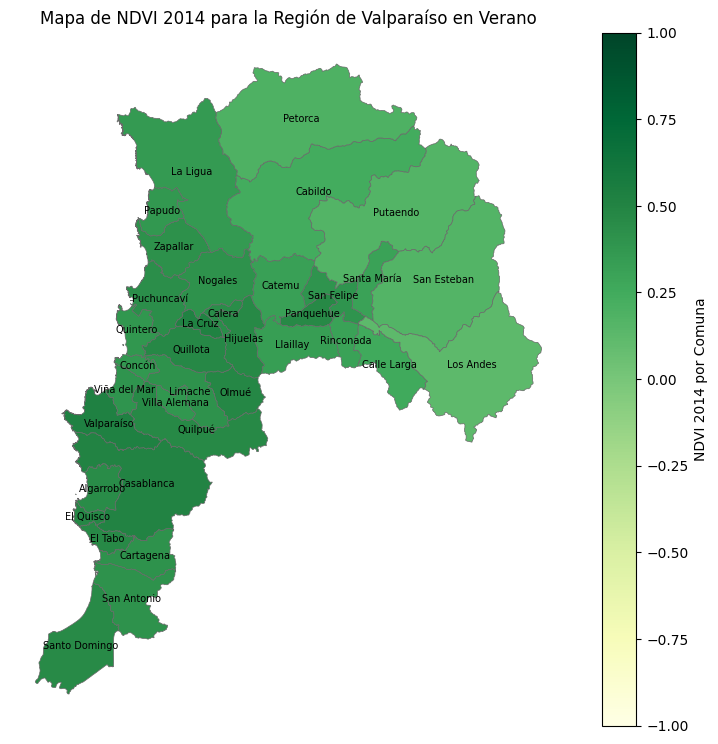

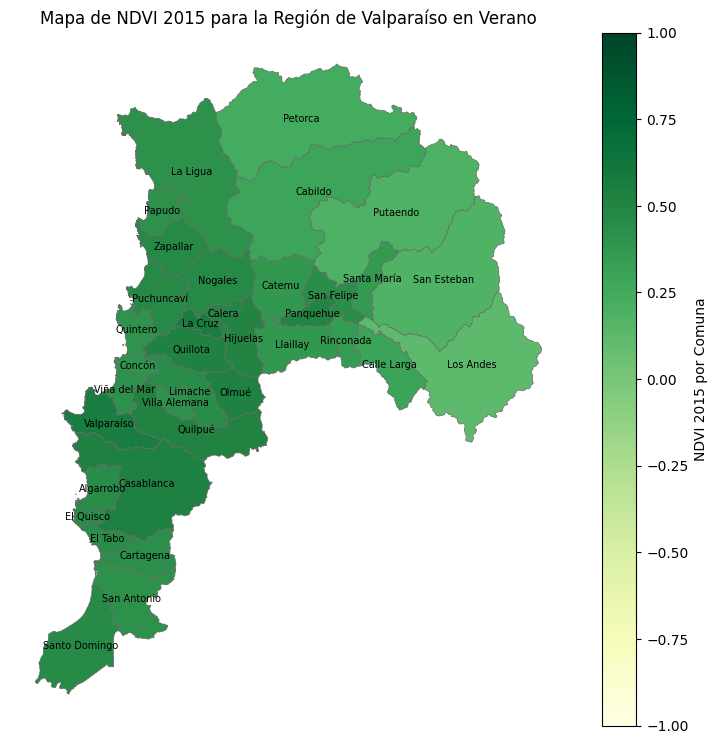

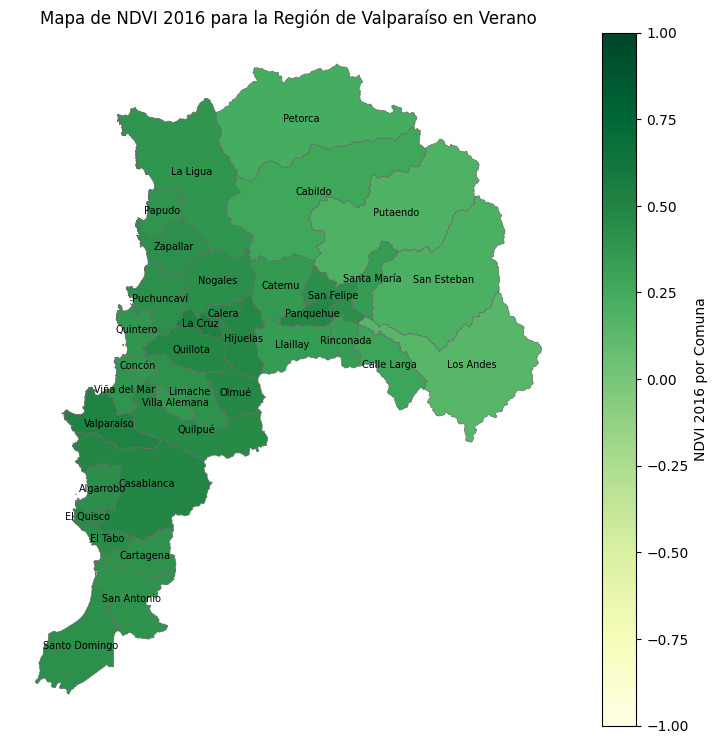

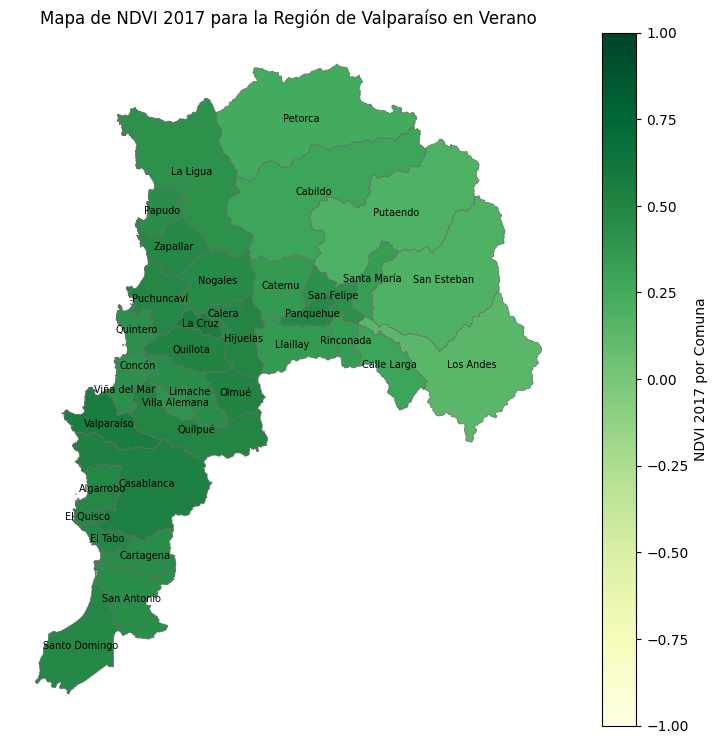

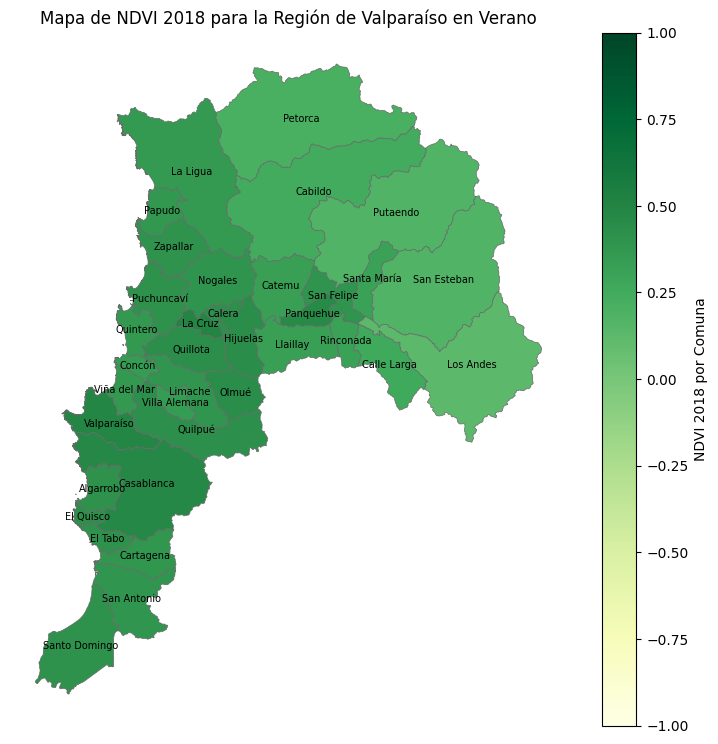

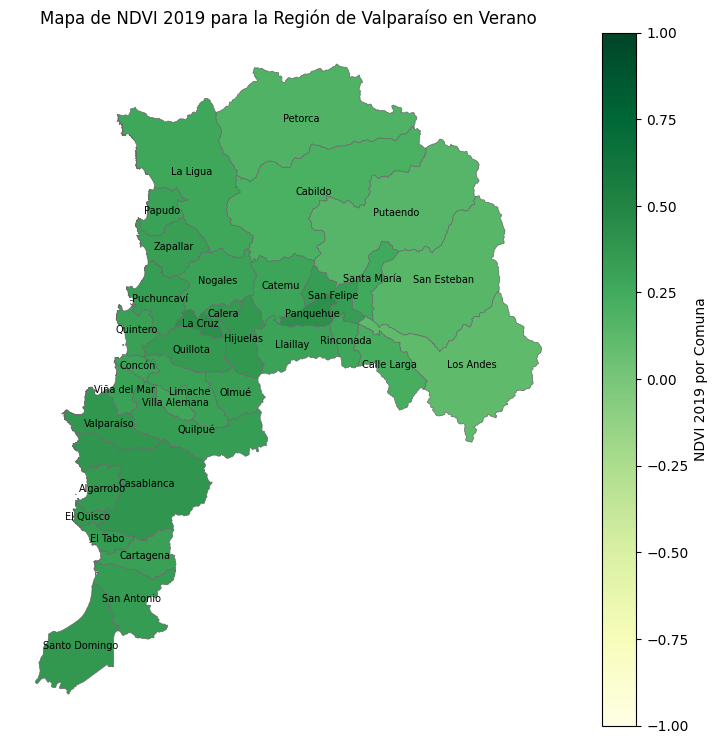

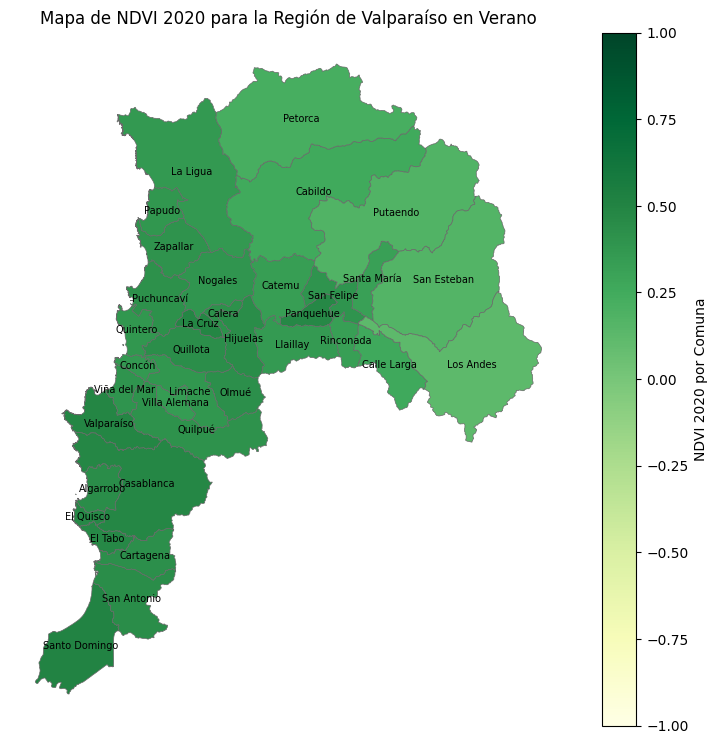

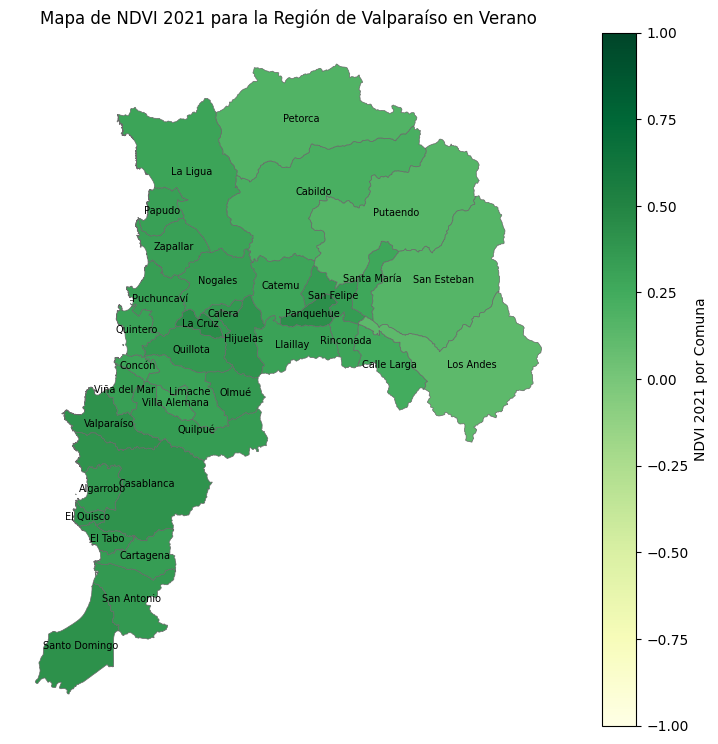

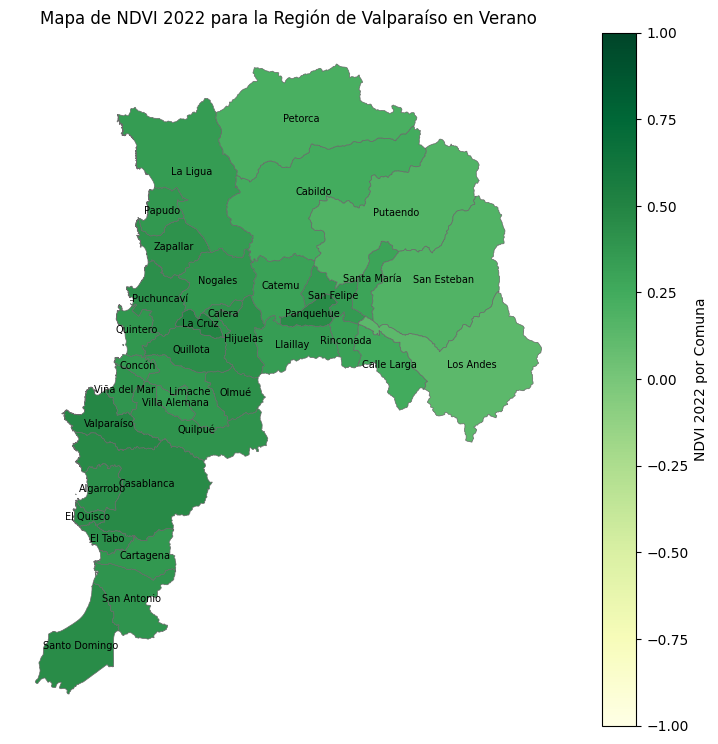

In [15]:
años = list(range(2002, 2023))

for año in años:
    df_summer_valparaiso_merged_año = df_summer_valparaiso_merged.dropna(subset=[f'{año}_NDVI'])
    df_summer_valparaiso_merged_año.loc[:, f'{año}_NDVI'] = df_summer_valparaiso_merged[f'{año}_NDVI'].fillna(0)

    # Crear la figura
    fig, ax = plt.subplots(1, 1, figsize=(9, 9))

    # Crear el mapa de NDVI
    df_summer_valparaiso_merged_año.plot(column=f'{año}_NDVI', ax=ax, legend=True,
              legend_kwds={'label': f"NDVI {año} por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5, 
              vmin=-1, vmax=1) # valores mínimos y máximos de la barra de colores
    
    # Añadir etiquetas
    for i, row in df_summer_valparaiso_merged_año.iterrows():
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        label = f"{row['NOM_COM']}"
        ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

    ax.set_axis_off()
    plt.title(f'Mapa de NDVI {año} para la Región de Valparaíso en Verano')
    plt.show()

### Invierno

In [16]:
# Unir los dos dataframes por el código de la comuna
df_winter_valparaiso_merged = gdf.merge(df_winter_valparaiso_copy, how='left', left_on='cod_comuna', right_on='COD_COMUNA')

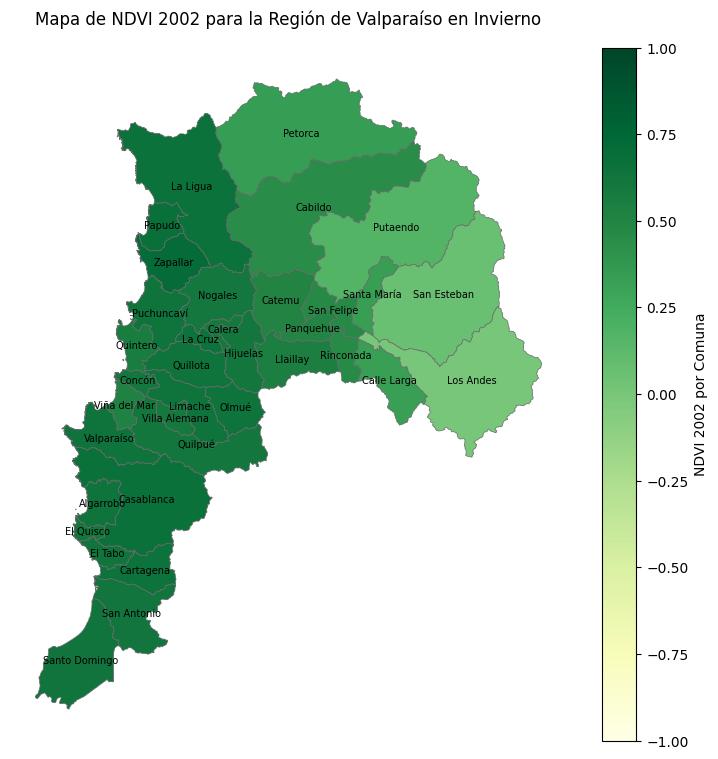

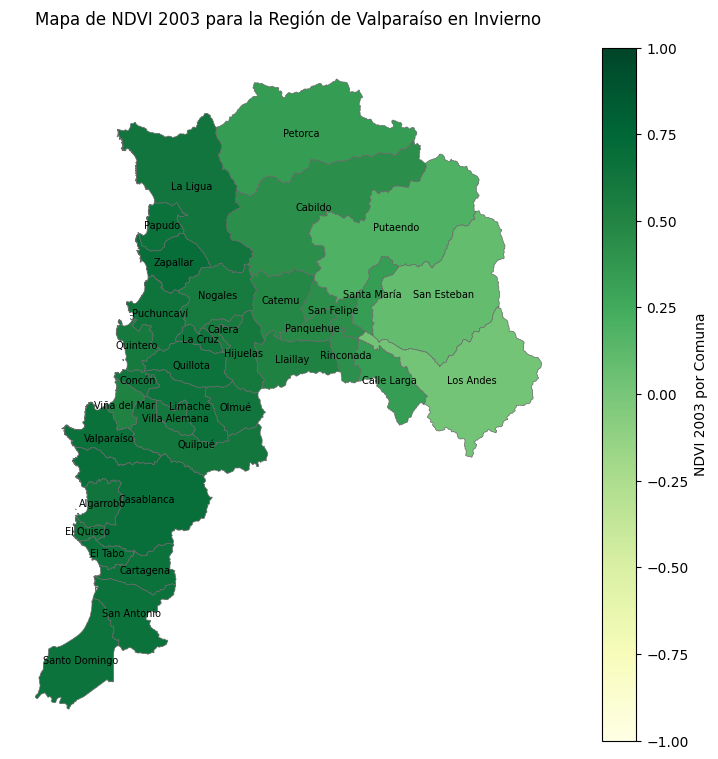

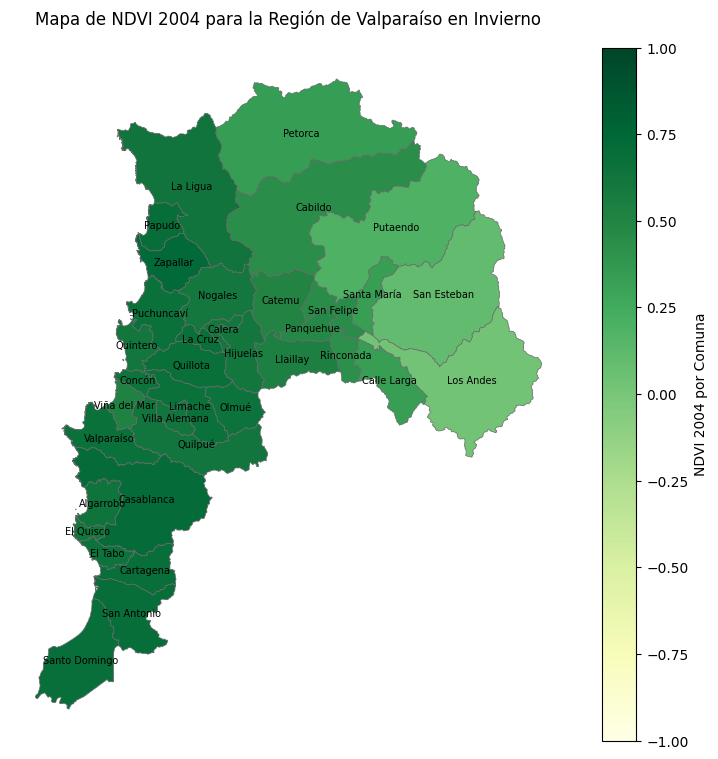

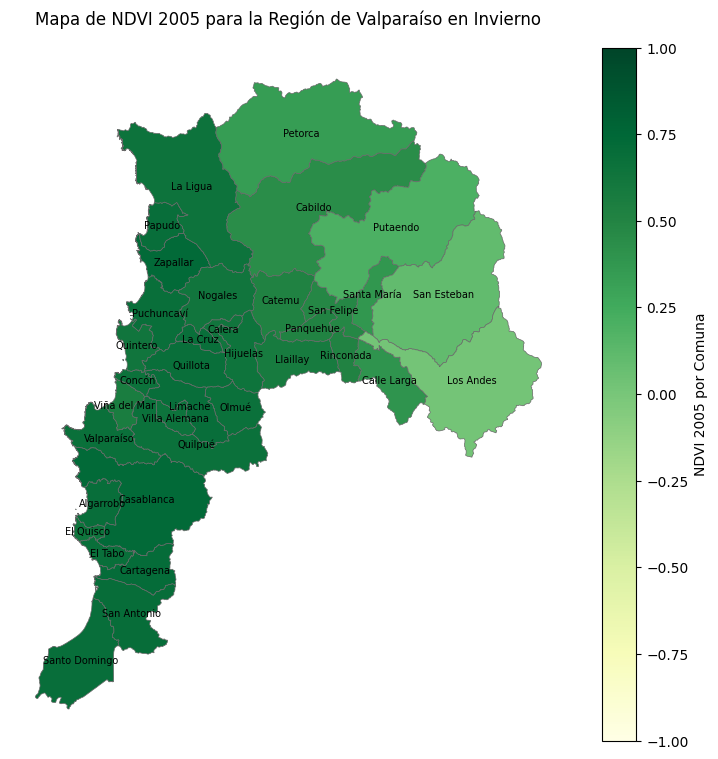

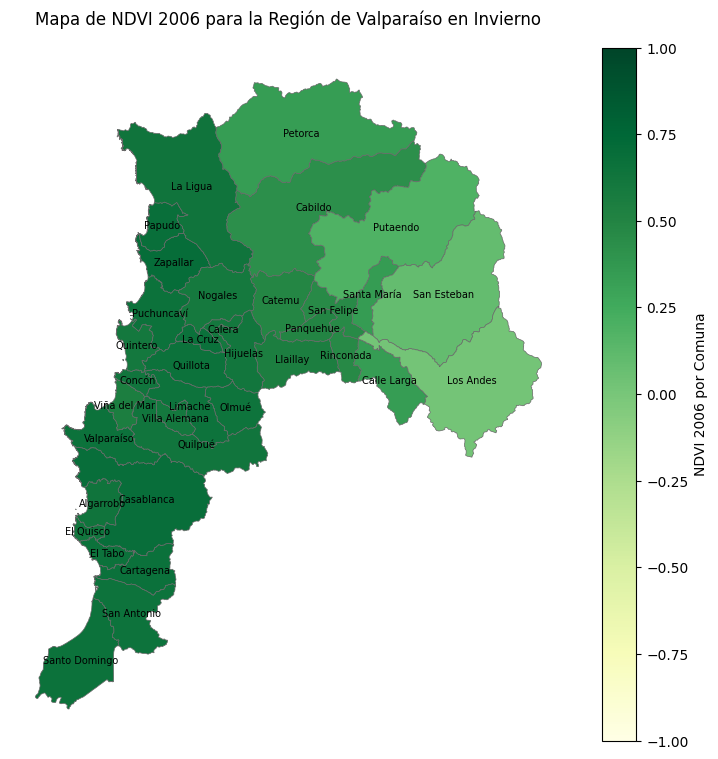

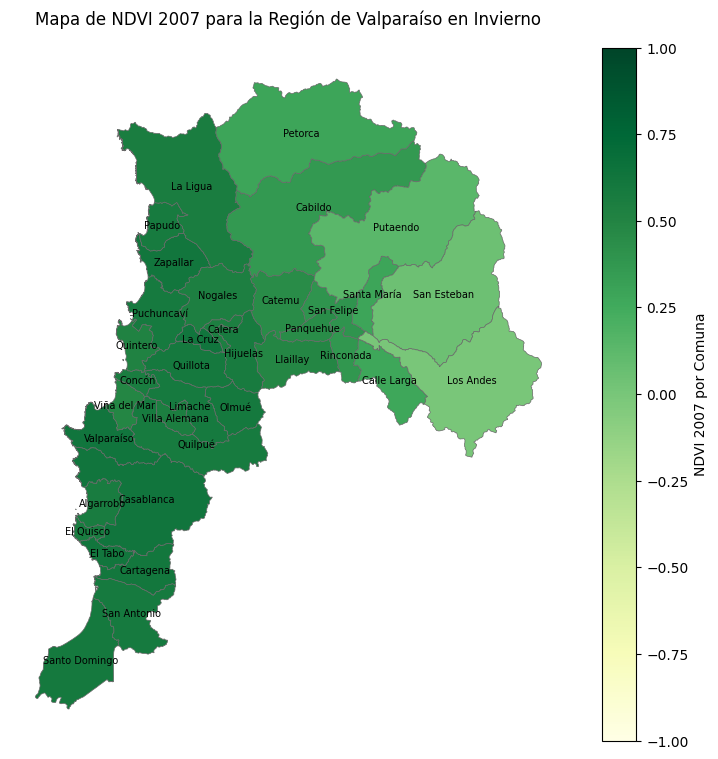

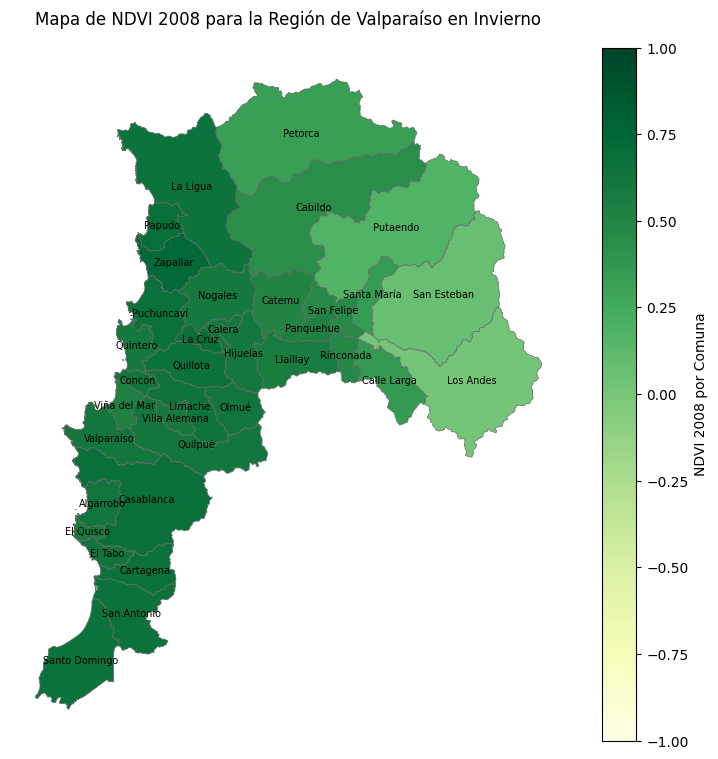

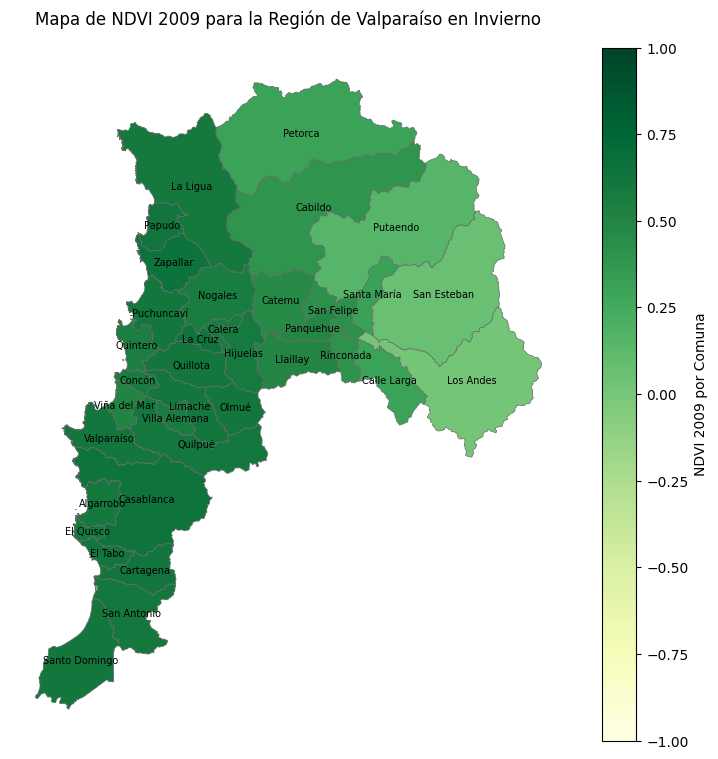

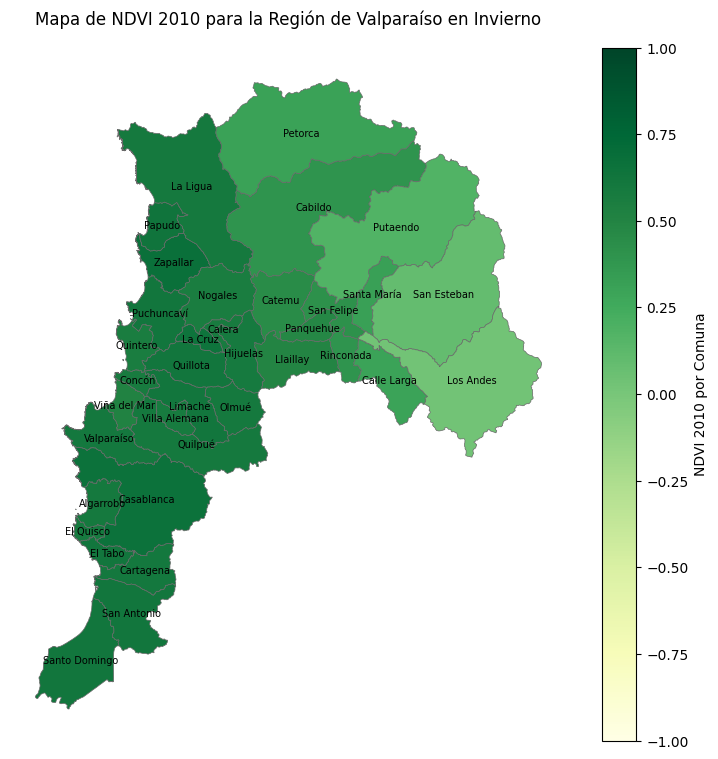

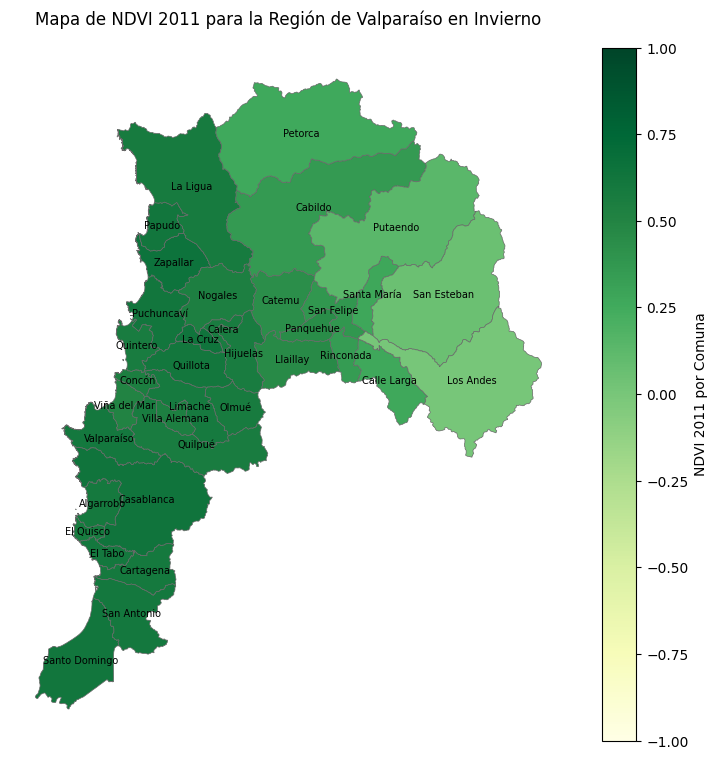

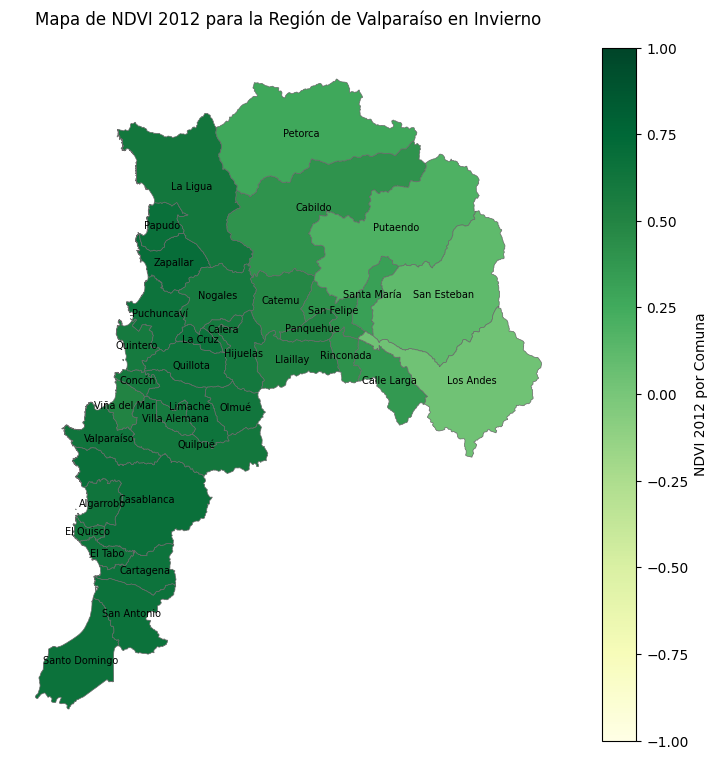

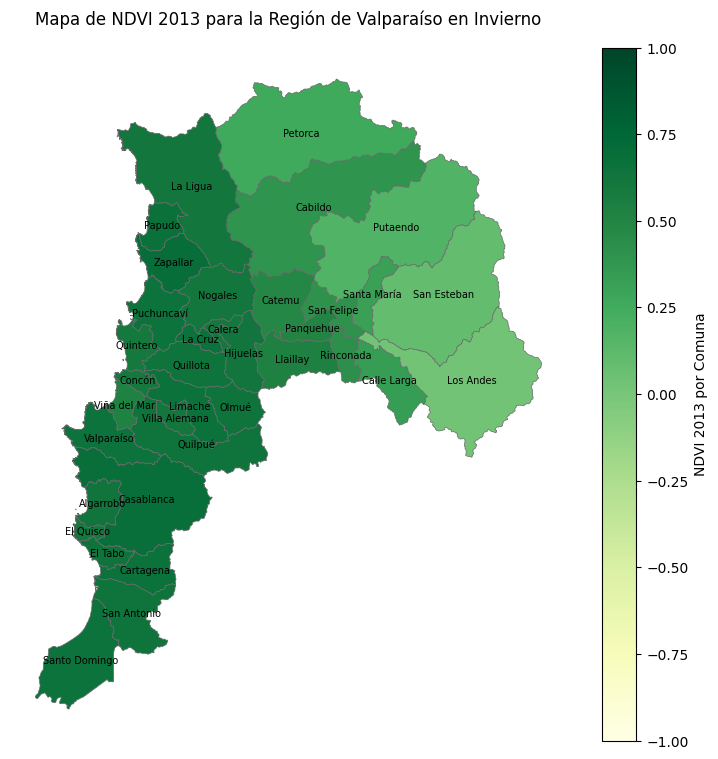

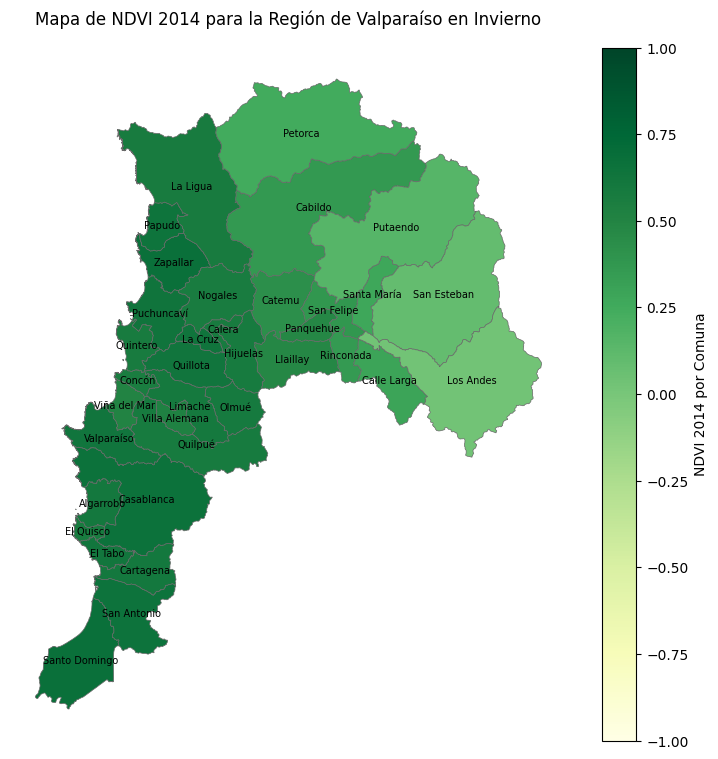

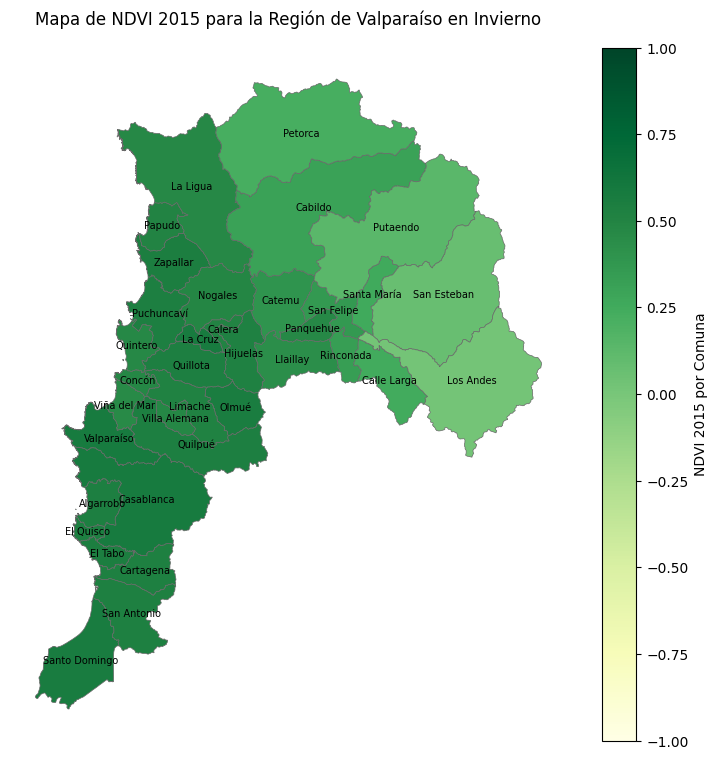

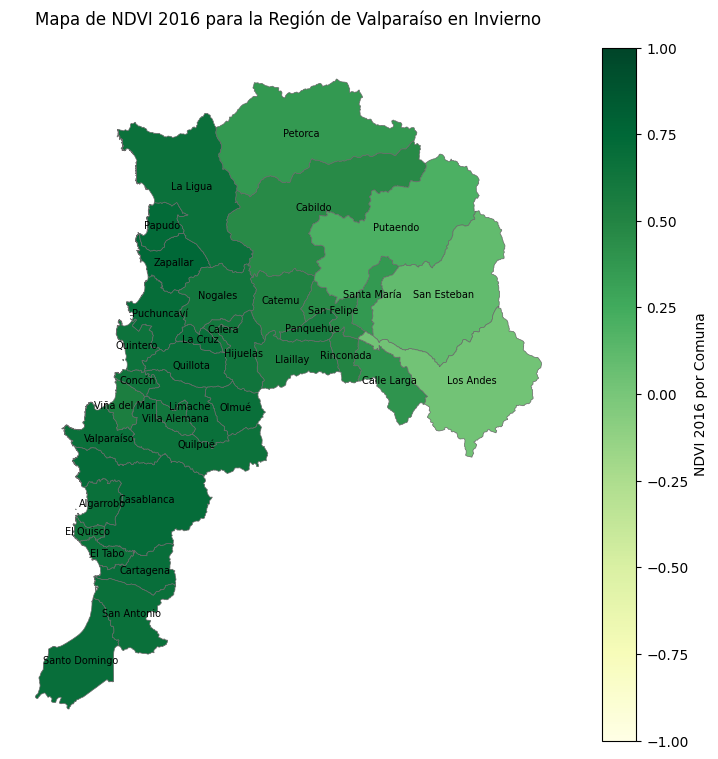

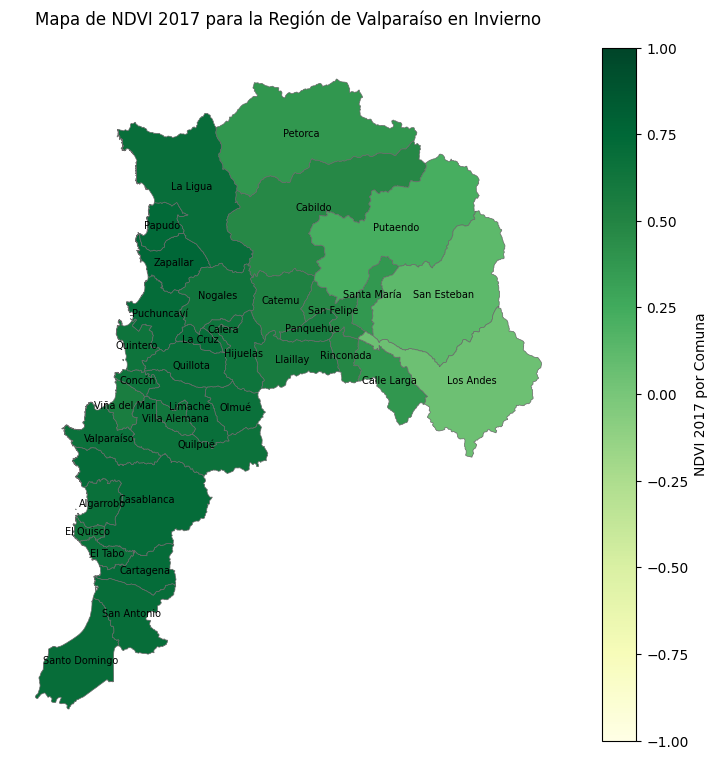

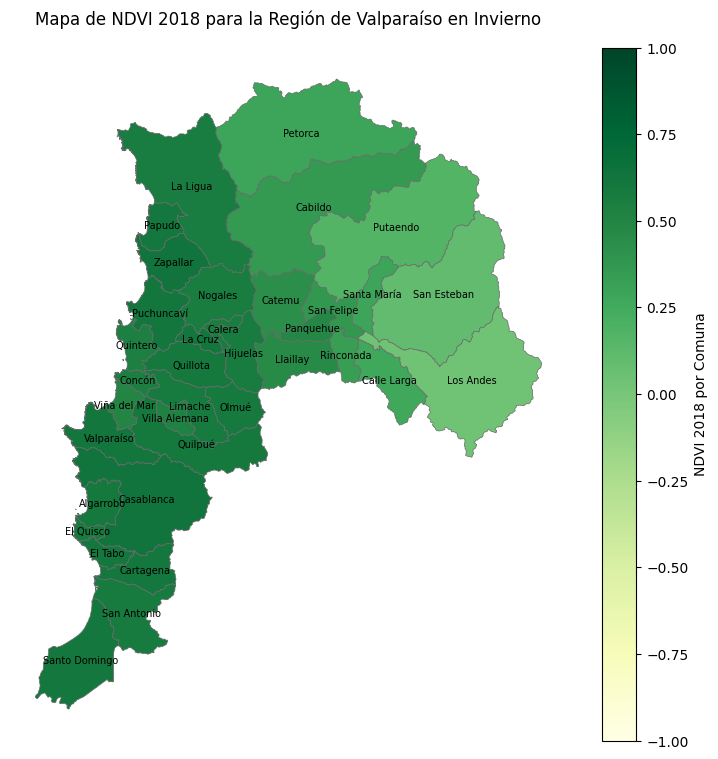

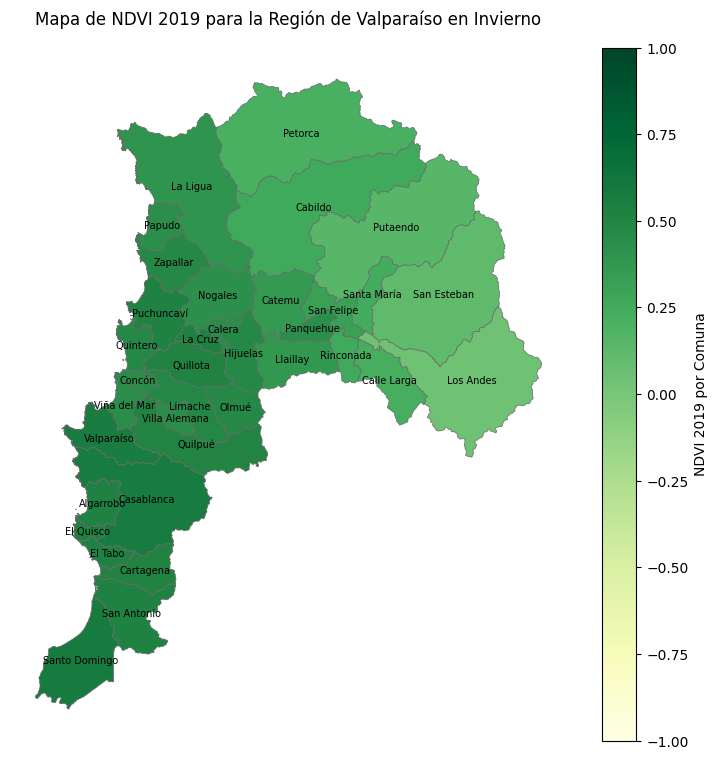

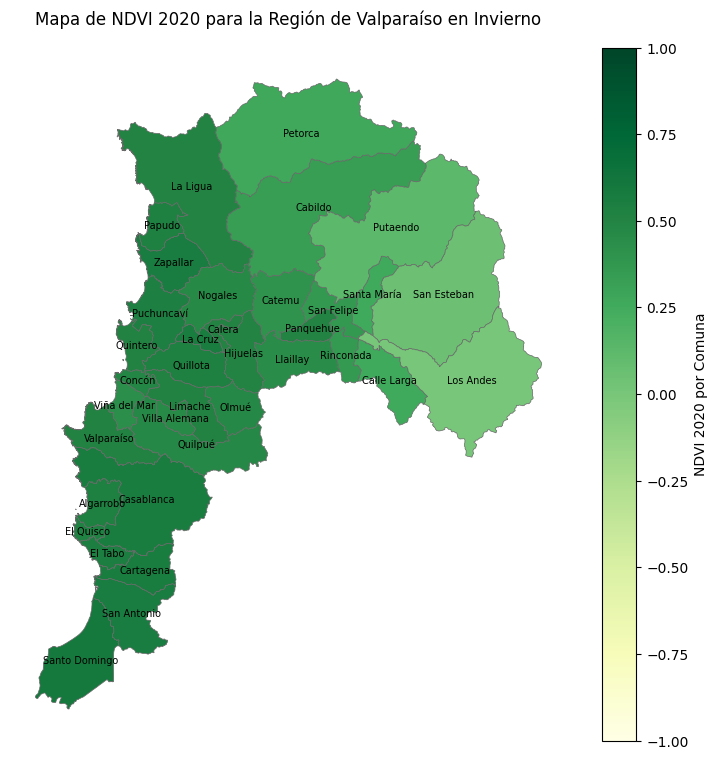

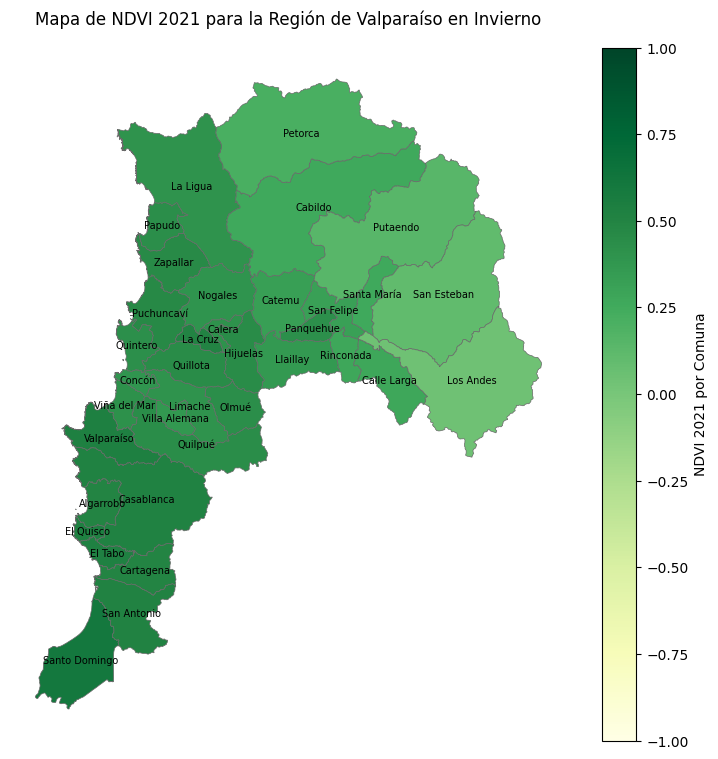

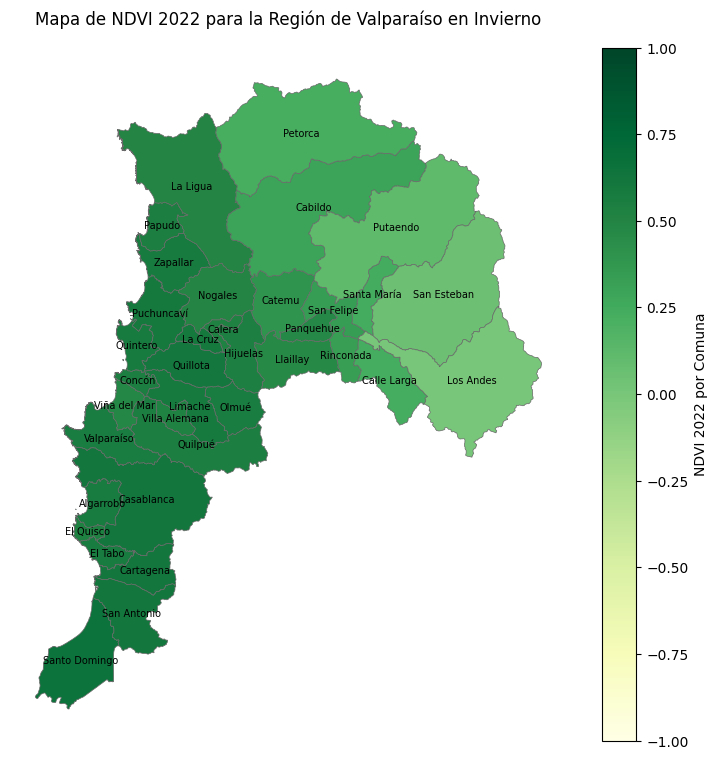

In [17]:
años = list(range(2002, 2023))

for año in años:
    df_winter_valparaiso_merged_año = df_winter_valparaiso_merged.dropna(subset=[f'{año}_NDVI'])
    df_winter_valparaiso_merged_año.loc[:, f'{año}_NDVI'] = df_winter_valparaiso_merged[f'{año}_NDVI'].fillna(0)

    # Crear la figura
    fig, ax = plt.subplots(1, 1, figsize=(9, 9))

    # Crear el mapa de NDVI
    df_winter_valparaiso_merged_año.plot(column=f'{año}_NDVI', ax=ax, legend=True,
              legend_kwds={'label': f"NDVI {año} por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5, 
              vmin=-1, vmax=1) # valores mínimos y máximos de la barra de colores
    
    # Añadir etiquetas
    for i, row in df_winter_valparaiso_merged_año.iterrows():
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        label = f"{row['NOM_COM']}"
        ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

    ax.set_axis_off()
    plt.title(f'Mapa de NDVI {año} para la Región de Valparaíso en Invierno')
    plt.show()

# Relación con vulnerabilidad

## SOVI
Columnas: name_comuna, cod_com, sovi, vulnerabilidad
* Los datos fueron extraídos, en su mayoría, del Censo 2017; Encuesta de Caracterización Socioeconómica Nacional (CASEN) 2017 y Portal de datos abierto FONASA 2018.
*  -1.5DE (vulnerabilidad baja) y +1DE (vulnerabilidad alta)

In [12]:
df_sovi = pd.read_csv("SOVI/sovi_datasets.csv",  encoding='utf-8')

In [13]:
# Visualizamos los primeros datos para ver como vienen en la BDD
df_sovi.head()

name_comuna  cod_com       sovi vulnerablidad
0        Iquique     1101  -5.660849    Medio-baja
1  Alto Hospicio     1107  12.583522          Alta
2   Pozo Almonte     1401   8.012849    Medio-alta
3         Camina     1402  33.675857          Alta
4       Colchane     1403  35.729492          Alta

Creamos DataFrame con la intersección entre SOVI y NDVI para invierno y verano

In [14]:
# Renombrar la columna 'cod_com' en df_sovi a 'COD_COMUNA'
df_sovi.rename(columns={'cod_com': 'COD_COMUNA'}, inplace=True)

#### Cambiamos las etiquetas (0_NDVI por 2002_NDVI)
(ya están ordenadas de manera cronológica)

In [15]:
# Diccionario con etiquetas nuevas (reemplaza 0_NDVI con 2002_NDVI)
nueva_etiqueta_ndvi = {
    f"{i}_NDVI": f"{2002 + i}_NDVI" for i in range(21)  # De 0_NDVI (2002) a 20_NDVI (2022)
}

# Cambiamos etiqueta
df_summer_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)
df_winter_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)

### Verano

In [16]:
# Intersección entre NDVI de verano en la Región de Valparaíso y SOVI
df_summer_valparaiso_sovi = pd.merge(df_sovi, df_summer_valparaiso_copy, on='COD_COMUNA', how='inner')

In [17]:
# Visualizamos los primeros datos para ver como quedó del DataFrame
df_summer_valparaiso_sovi.head()

name_comuna  COD_COMUNA       sovi vulnerablidad  2002_NDVI  2003_NDVI  \
0  Valparaiso        5101 -10.579356    Medio-baja   0.542477   0.532085   
1  Casablanca        5102  -6.221885    Medio-baja   0.519514   0.505953   
2      Concon        5103 -14.610727          Baja   0.392203   0.355820   
3  Puchuncavi        5105  -4.775456    Medio-baja   0.425312   0.391143   
4    Quintero        5107  -5.228055    Medio-baja   0.389686   0.367314   

   2004_NDVI  2005_NDVI  2006_NDVI  2007_NDVI  ...  2019_NDVI  2020_NDVI  \
0   0.538777   0.561389   0.557981   0.479661  ...   0.377301   0.486670   
1   0.521202   0.546584   0.541012   0.459746  ...   0.387949   0.478385   
2   0.380595   0.401097   0.396111   0.351402  ...   0.293149   0.360013   
3   0.434939   0.465052   0.449210   0.392366  ...   0.341092   0.419410   
4   0.396314   0.412003   0.403898   0.373625  ...   0.312866   0.382671   

   2021_NDVI  2022_NDVI     NOM_COM    NOM_PROV     NOM_REG   MIN   MAX  MEAN  
0   0.407823   0.480557  Valparaíso  Valparaíso  Valparaíso  0.38  0.56  0.51  
1   0.402630   0.458859  Casablanca  Valparaíso  Valparaíso  0.39  0.55  0.49  
2   0.281388   0.359144      Concón  Valparaíso  Valparaíso  0.28  0.41  0.36  
3   0.331956   0.427697  Puchuncaví  Valparaíso  Valparaíso  0.33  0.48  0.42  
4   0.308899   0.375001    Quintero  Valparaíso  Valparaíso  0.31  0.43  0.38  

[5 rows x 31 columns]

Vemos que la columna name_comuna y NOM_COM contienen la misma información. 
Eliminremos la columna name_comuna

In [18]:
df_summer_valparaiso_sovi.drop(columns=['name_comuna'], inplace=True)
df_summer_valparaiso_sovi.head()

COD_COMUNA       sovi vulnerablidad  2002_NDVI  2003_NDVI  2004_NDVI  \
0        5101 -10.579356    Medio-baja   0.542477   0.532085   0.538777   
1        5102  -6.221885    Medio-baja   0.519514   0.505953   0.521202   
2        5103 -14.610727          Baja   0.392203   0.355820   0.380595   
3        5105  -4.775456    Medio-baja   0.425312   0.391143   0.434939   
4        5107  -5.228055    Medio-baja   0.389686   0.367314   0.396314   

   2005_NDVI  2006_NDVI  2007_NDVI  2008_NDVI  ...  2019_NDVI  2020_NDVI  \
0   0.561389   0.557981   0.479661   0.513356  ...   0.377301   0.486670   
1   0.546584   0.541012   0.459746   0.520731  ...   0.387949   0.478385   
2   0.401097   0.396111   0.351402   0.390249  ...   0.293149   0.360013   
3   0.465052   0.449210   0.392366   0.445222  ...   0.341092   0.419410   
4   0.412003   0.403898   0.373625   0.404944  ...   0.312866   0.382671   

   2021_NDVI  2022_NDVI     NOM_COM    NOM_PROV     NOM_REG   MIN   MAX  MEAN  
0   0.407823   0.480557  Valparaíso  Valparaíso  Valparaíso  0.38  0.56  0.51  
1   0.402630   0.458859  Casablanca  Valparaíso  Valparaíso  0.39  0.55  0.49  
2   0.281388   0.359144      Concón  Valparaíso  Valparaíso  0.28  0.41  0.36  
3   0.331956   0.427697  Puchuncaví  Valparaíso  Valparaíso  0.33  0.48  0.42  
4   0.308899   0.375001    Quintero  Valparaíso  Valparaíso  0.31  0.43  0.38  

[5 rows x 30 columns]

#### Comuna con el mayor y menor NDVI promedio (MEAN)

In [19]:
# Encontrar la fila con el MEAN más alto
max_mean_row = df_summer_valparaiso_sovi.loc[df_summer_valparaiso_sovi['MEAN'].idxmax()]
# Encontrar la fila con el MEAN más bajo
min_mean_row = df_summer_valparaiso_sovi.loc[df_summer_valparaiso_sovi['MEAN'].idxmin()]

# Imprimir los resultados
print("Fila con el MEAN de NDVI más alto:")
print(f"Comuna: {max_mean_row['NOM_COM']}, MEAN NDVI: {max_mean_row['MEAN']}, Vulnerabilidad: {max_mean_row['vulnerablidad']}, SOVI:{max_mean_row['sovi']} ")

print("\nFila con el MEAN de NDVI más bajo:")
print(f"Comuna: {min_mean_row['NOM_COM']}, MEAN NDVI: {min_mean_row['MEAN']}, Vulnerabilidad: {min_mean_row['vulnerablidad']}, SOVI:{min_mean_row['sovi']} ")

Fila con el MEAN de NDVI más alto:
Comuna: La Cruz, MEAN NDVI: 0.52, Vulnerabilidad: Medio-baja, SOVI:-9.18856872774627 

Fila con el MEAN de NDVI más bajo:
Comuna: Los Andes, MEAN NDVI: 0.13, Vulnerabilidad: Medio-baja, SOVI:-10.1541721117887 


#### SOVI y NDVI Promedio en Verano en las comunas de la Región de Valparaísio

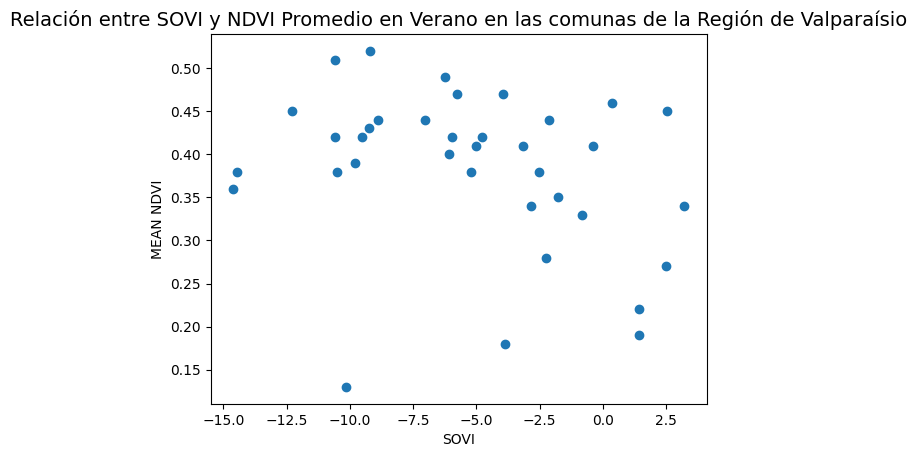

In [20]:
fig, ax = plt.subplots()
ax.scatter(df_summer_valparaiso_sovi.sovi, df_summer_valparaiso_sovi.MEAN)
# Nombres de los ejes
ax.set_xlabel('SOVI')
ax.set_ylabel('MEAN NDVI')
plt.title('Relación entre SOVI y NDVI Promedio en Verano en las comunas de la Región de Valparaísio', fontsize=14)
plt.show()

##### Comuna con mayor y menor SOVI
* Recordar: -1.5DE (vulnerabilidad baja) y +1DE (vulnerabilidad alta)

In [21]:
# Encontrar la fila con el sovi más alto
max_sovi_row = df_summer_valparaiso_sovi.loc[df_summer_valparaiso_sovi['sovi'].idxmax()]
# Encontrar la fila con el sovi más bajo
min_sovi_row = df_summer_valparaiso_sovi.loc[df_summer_valparaiso_sovi['sovi'].idxmin()]

# Imprimir los resultados
print("Fila con SOVI más alto (mayor vulnerabilidad):")
print(f"Comuna: {max_sovi_row['NOM_COM']},  SOVI:{max_sovi_row['sovi']}, MEAN NDVI: {max_sovi_row['MEAN']}, Vulnerabilidad: {max_sovi_row['vulnerablidad']}")

print("\nFila con SOVI más bajo (menor vulnerabilidad):")
print(f"Comuna: {min_sovi_row['NOM_COM']},  SOVI:{min_sovi_row['sovi']}, MEAN NDVI: {min_sovi_row['MEAN']}, Vulnerabilidad: {min_sovi_row['vulnerablidad']}")

Fila con SOVI más alto (mayor vulnerabilidad):
Comuna: Catemu,  SOVI:3.21051317224034, MEAN NDVI: 0.34, Vulnerabilidad: Medio-alta

Fila con SOVI más bajo (menor vulnerabilidad):
Comuna: Concón,  SOVI:-14.6107269939586, MEAN NDVI: 0.36, Vulnerabilidad: Baja


### Invierno

In [22]:
# Intersección entre NDVI de invierno en la Región de Valparaíso y SOVI
df_winter_valparaiso_sovi = pd.merge(df_sovi, df_winter_valparaiso_copy, on='COD_COMUNA', how='inner')

#### Comuna con el mayor y menor NDVI promedio (MEAN)

In [23]:
# Encontrar la fila con el MEAN más alto
max_mean_row = df_winter_valparaiso_sovi.loc[df_winter_valparaiso_sovi['MEAN'].idxmax()]
# Encontrar la fila con el MEAN más bajo
min_mean_row = df_winter_valparaiso_sovi.loc[df_winter_valparaiso_sovi['MEAN'].idxmin()]

# Imprimir los resultados
print("Fila con el MEAN de NDVI más alto:")
print(f"Comuna: {max_mean_row['NOM_COM']}, MEAN: {max_mean_row['MEAN']}, Vulnerabilidad: {max_mean_row['vulnerablidad']}, SOVI:{max_mean_row['sovi']} ")

print("\nFila con el MEAN de NDVI más bajo:")
print(f"Comuna: {min_mean_row['NOM_COM']}, MEAN: {min_mean_row['MEAN']}, Vulnerabilidad: {min_mean_row['vulnerablidad']}, SOVI:{min_mean_row['sovi']} ")

Fila con el MEAN de NDVI más alto:
Comuna: Zapallar, MEAN: 0.655, Vulnerabilidad: Medio-baja, SOVI:-10.6052954942477 

Fila con el MEAN de NDVI más bajo:
Comuna: Los Andes, MEAN: 0.023, Vulnerabilidad: Medio-baja, SOVI:-10.1541721117887 


#### Gráfico de dispersión entre SOVI y NDVI Promedio en Invierno en las comunas de la Región de Valparaísio

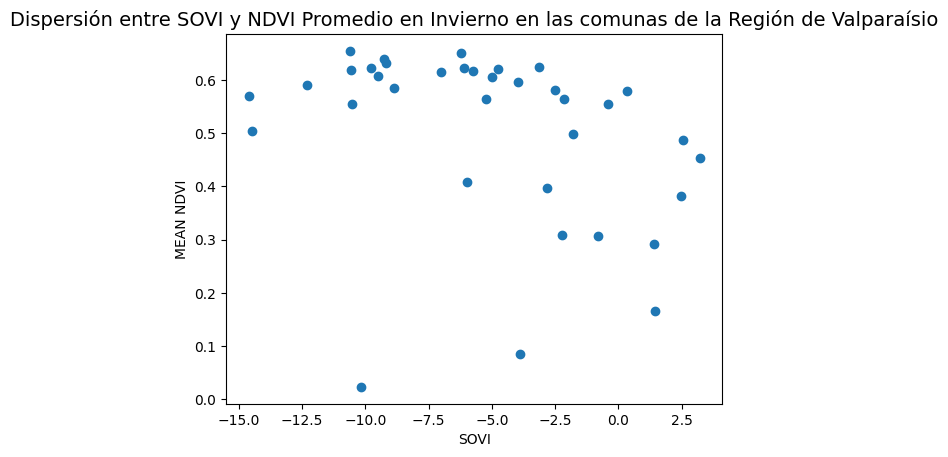

In [24]:
fig, ax = plt.subplots()
ax.scatter(df_winter_valparaiso_sovi.sovi, df_winter_valparaiso_sovi.MEAN)
# Nombres de los ejes
ax.set_xlabel('SOVI')
ax.set_ylabel('MEAN NDVI')
plt.title('Dispersión entre SOVI y NDVI Promedio en Invierno en las comunas de la Región de Valparaísio', fontsize=14)
plt.show()

##### Comuna con mayor y menor SOVI
* Recordar: -1.5DE (vulnerabilidad baja) y +1DE (vulnerabilidad alta)

In [25]:
# Encontrar la fila con el sovi más alto
max_sovi_row = df_winter_valparaiso_sovi.loc[df_winter_valparaiso_sovi['sovi'].idxmax()]
# Encontrar la fila con el sovi más bajo
min_sovi_row = df_winter_valparaiso_sovi.loc[df_winter_valparaiso_sovi['sovi'].idxmin()]

# Imprimir los resultados
print("Fila con SOVI más alto (mayor vulnerabilidad):")
print(f"Comuna: {max_sovi_row['NOM_COM']},  SOVI:{max_sovi_row['sovi']}, MEAN NDVI: {max_sovi_row['MEAN']}, Vulnerabilidad: {max_sovi_row['vulnerablidad']}")

print("\nFila con SOVI más bajo (menor vulnerabilidad):")
print(f"Comuna: {min_sovi_row['NOM_COM']},  SOVI:{min_sovi_row['sovi']}, MEAN NDVI: {min_sovi_row['MEAN']}, Vulnerabilidad: {min_sovi_row['vulnerablidad']}")

Fila con SOVI más alto (mayor vulnerabilidad):
Comuna: Catemu,  SOVI:3.21051317224034, MEAN NDVI: 0.453, Vulnerabilidad: Medio-alta

Fila con SOVI más bajo (menor vulnerabilidad):
Comuna: Concón,  SOVI:-14.6107269939586, MEAN NDVI: 0.57, Vulnerabilidad: Baja


## Nacimientos en la Región de Valparaíso

In [184]:
df_nacimientos = pd.read_csv("births_valparaiso_1992_2020/births_valparaiso.csv",  encoding='utf-8')
# Filtrar los nacimientos y dejamos los que están entre 2002 y 2021 (inclusive)
df_nacimientos['year_nac'] = pd.to_numeric(df_nacimientos['year_nac'], errors='coerce')
df_nacimientos = df_nacimientos[(df_nacimientos['year_nac'] >= 2002)]

In [185]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [186]:
# Visualizamos los primeros datos para ver como vienen en la BDD
df_nacimientos.head()

id   com      name_com  reg    name_reg  weeks    date_nac  day_nac  \
24    4123  5109  Vina del Mar    5  Valparaiso     38  2008-04-25       25   
26    9598  5101    Valparaiso    5  Valparaiso     40  2008-02-19       19   
34   32082  5802       Limache    5  Valparaiso     38  2008-02-29       29   
36   34548  5101    Valparaiso    5  Valparaiso     31  2008-05-11       11   
327  69000  5501      Quillota    5  Valparaiso     39  2008-07-01        1   

     month_nac  year_nac  date_week1  year_week1  month_week1     ym_week1  \
24           4      2008  2007-08-10        2007            8  2007.583333   
26           2      2008  2007-05-22        2007            5  2007.333333   
34           2      2008  2007-06-15        2007            6  2007.416667   
36           5      2008  2007-10-14        2007           10  2007.750000   
327          7      2008  2007-10-09        2007           10  2007.750000   

    date_start_week_gest date_ends_week_gest   sex   tbw  size age_group_mom  \
24            2007-08-10          2008-04-25   Boy  3590  52.0          <=20   
26            2007-05-22          2008-02-19  Girl  3240  51.0         20-29   
34            2007-06-15          2008-02-29   Boy  3050  47.0         20-29   
36            2007-10-14          2008-05-11   Boy  1760  42.0         20-29   
327           2007-10-09          2008-07-01   Boy  3730  50.0          <=20   

    educ_group_mom job_group_mom age_group_dad educ_group_dad job_group_dad  \
24         Primary   Not working       Unknown        Unknown       Unknown   
26       Secondary   Not working       Unknown        Unknown       Unknown   
34         Primary   Not working         30-39      Secondary      Employed   
36       Secondary   Not working         20-29      Secondary      Employed   
327      Secondary      Employed       Unknown        Unknown       Unknown   

     birth_preterm  birth_very_preterm  birth_moderately_preterm  \
24               0                   0                         0   
26               0                   0                         0   
34               0                   0                         0   
36               1                   1                         0   
327              0                   0                         0   

     birth_late_preterm  birth_term  birth_posterm  
24                    0           1              0  
26                    0           1              0  
34                    0           1              0  
36                    0           0              0  
327                   0           1              0

Vemos que en df_nacimientos la columna con el nombre de las comunas se llama name_com y que no tienen los tildes (en df_summer_valparaiso_sovi es Valparaíso y en df_nacimientos es Valparaiso).
Cambiamos el nombre de la columna y le quitamos los tildes a df_summer_valparaiso_sovi

In [187]:
# Renombrar la columna 'cod_com' en df_sovi a 'COD_COMUNA'
df_nacimientos.rename(columns={'name_com': 'NOM_COM'}, inplace=True)

In [188]:
# Nuevamente visualizamos los primeros datos para ver como vienen en la BDD
df_nacimientos.head()

id   com       NOM_COM  reg    name_reg  weeks    date_nac  day_nac  \
24    4123  5109  Vina del Mar    5  Valparaiso     38  2008-04-25       25   
26    9598  5101    Valparaiso    5  Valparaiso     40  2008-02-19       19   
34   32082  5802       Limache    5  Valparaiso     38  2008-02-29       29   
36   34548  5101    Valparaiso    5  Valparaiso     31  2008-05-11       11   
327  69000  5501      Quillota    5  Valparaiso     39  2008-07-01        1   

     month_nac  year_nac  date_week1  year_week1  month_week1     ym_week1  \
24           4      2008  2007-08-10        2007            8  2007.583333   
26           2      2008  2007-05-22        2007            5  2007.333333   
34           2      2008  2007-06-15        2007            6  2007.416667   
36           5      2008  2007-10-14        2007           10  2007.750000   
327          7      2008  2007-10-09        2007           10  2007.750000   

    date_start_week_gest date_ends_week_gest   sex   tbw  size age_group_mom  \
24            2007-08-10          2008-04-25   Boy  3590  52.0          <=20   
26            2007-05-22          2008-02-19  Girl  3240  51.0         20-29   
34            2007-06-15          2008-02-29   Boy  3050  47.0         20-29   
36            2007-10-14          2008-05-11   Boy  1760  42.0         20-29   
327           2007-10-09          2008-07-01   Boy  3730  50.0          <=20   

    educ_group_mom job_group_mom age_group_dad educ_group_dad job_group_dad  \
24         Primary   Not working       Unknown        Unknown       Unknown   
26       Secondary   Not working       Unknown        Unknown       Unknown   
34         Primary   Not working         30-39      Secondary      Employed   
36       Secondary   Not working         20-29      Secondary      Employed   
327      Secondary      Employed       Unknown        Unknown       Unknown   

     birth_preterm  birth_very_preterm  birth_moderately_preterm  \
24               0                   0                         0   
26               0                   0                         0   
34               0                   0                         0   
36               1                   1                         0   
327              0                   0                         0   

     birth_late_preterm  birth_term  birth_posterm  
24                    0           1              0  
26                    0           1              0  
34                    0           1              0  
36                    0           0              0  
327                   0           1              0

Identificamos la semana de inicio del tercer trimesre
* Consideramos partos a término (que nacieron entre las 38 - 40 semanas)

In [189]:
# Filtramos nacimientos a término (38-40 semanas)
df_nacimientos_termino = df_nacimientos[(df_nacimientos['birth_term'] == 1)]

df_nacimientos_termino['date_nac'] = pd.to_datetime(df_nacimientos_termino['date_nac'], errors='coerce')

df_nacimientos_termino['date_week1'] = pd.to_datetime(df_nacimientos_termino['date_week1'], errors='coerce')

# Calcular la fecha de inicio del tercer trimestre: se suman 27 semanas a la primera semana de gestación
df_nacimientos_termino['semana_tercer_trimestre'] = df_nacimientos_termino['date_week1'] + pd.to_timedelta(27, unit='W')

/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_1716/1192578470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nacimientos_termino['date_nac'] = pd.to_datetime(df_nacimientos_termino['date_nac'], errors='coerce')
/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_1716/1192578470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nacimientos_termino['date_week1'] = pd.to_datetime(df_nacimientos_termino['date_week1'], errors='coerce')
/var/folders/mc/2x27ctzd463ffrmth0gvlb180000

In [190]:
# Verificar los resultados
df_nacimientos_termino.head()

id   com        NOM_COM  reg    name_reg  weeks   date_nac  day_nac  \
24    4123  5109   Vina del Mar    5  Valparaiso     38 2008-04-25       25   
26    9598  5101     Valparaiso    5  Valparaiso     40 2008-02-19       19   
34   32082  5802        Limache    5  Valparaiso     38 2008-02-29       29   
327  69000  5501       Quillota    5  Valparaiso     39 2008-07-01        1   
328  69004  5804  Villa Alemana    5  Valparaiso     39 2008-06-20       20   

     month_nac  year_nac date_week1  year_week1  month_week1     ym_week1  \
24           4      2008 2007-08-10        2007            8  2007.583333   
26           2      2008 2007-05-22        2007            5  2007.333333   
34           2      2008 2007-06-15        2007            6  2007.416667   
327          7      2008 2007-10-09        2007           10  2007.750000   
328          6      2008 2007-09-28        2007            9  2007.666667   

    date_start_week_gest date_ends_week_gest   sex   tbw  size age_group_mom  \
24            2007-08-10          2008-04-25   Boy  3590  52.0          <=20   
26            2007-05-22          2008-02-19  Girl  3240  51.0         20-29   
34            2007-06-15          2008-02-29   Boy  3050  47.0         20-29   
327           2007-10-09          2008-07-01   Boy  3730  50.0          <=20   
328           2007-09-28          2008-06-20   Boy  3060  47.0          <=20   

    educ_group_mom job_group_mom age_group_dad educ_group_dad job_group_dad  \
24         Primary   Not working       Unknown        Unknown       Unknown   
26       Secondary   Not working       Unknown        Unknown       Unknown   
34         Primary   Not working         30-39      Secondary      Employed   
327      Secondary      Employed       Unknown        Unknown       Unknown   
328      Secondary   Not working         40-49      Secondary      Employed   

     birth_preterm  birth_very_preterm  birth_moderately_preterm  \
24               0                   0                         0   
26               0                   0                         0   
34               0                   0                         0   
327              0                   0                         0   
328              0                   0                         0   

     birth_late_preterm  birth_term  birth_posterm semana_tercer_trimestre  
24                    0           1              0              2008-02-15  
26                    0           1              0              2007-11-27  
34                    0           1              0              2007-12-21  
327                   0           1              0              2008-04-15  
328                   0           1              0              2008-04-04

### Asignación NDVI

Asignamos la estación en la que cae el tercer trimestre
* Verano: 21/12 del año anterior hasta 21/03 del año actual.
* Invierno: 21/06 al 21/09 del mismo año.

#### Nacimientos que tuvieron tu tercer trimestre completo en verano o invierno

Creamos función que verifica que desde la semana de inicio del tercer al nacimiento fue solo verano
* Asigna la estación si el inicio del tercer trimestre cae en el mes de inicio de la estación y la ultima semana de gestación en el último mes de la estación

In [191]:
def asignar_estacion_trimestre(inicio, fin):
    if pd.isna(inicio) or pd.isna(fin):  # Verificar valores nulos
        return "Fuera de estación"

    # Verano: Si el inicio es en diciembre o enero y el fin en febrero o marzo
    if (inicio.month in [12, 1]) and (fin.month in [2, 3]):
        return f"Verano"

    # Invierno: Si el inicio es en junio o julio y el fin en agosto o septiembre
    if (inicio.month in [6, 7]) and (fin.month in [8, 9]):
        return f"Invierno"

    return "Fuera de estación"  # Si no calza completamente en ninguna estación



In [192]:
# Asegurar que las columnas relevantes sean de tipo datetime
df_nacimientos_termino['date_ends_week_gest'] = pd.to_datetime(df_nacimientos_termino['date_ends_week_gest'], errors='coerce')
df_nacimientos_termino['semana_tercer_trimestre'] = pd.to_datetime(df_nacimientos_termino['semana_tercer_trimestre'], errors='coerce')

# Asignar estación usando la función creada anteriormente
df_nacimientos_termino['estacion_tercer_trimestre'] = df_nacimientos_termino.apply(
    lambda row: asignar_estacion_trimestre(row['semana_tercer_trimestre'], row['date_ends_week_gest']),
    axis=1
)


/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_1716/3373079131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nacimientos_termino['date_ends_week_gest'] = pd.to_datetime(df_nacimientos_termino['date_ends_week_gest'], errors='coerce')
/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_1716/3373079131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nacimientos_termino['semana_tercer_trimestre'] = pd.to_datetime(df_nacimientos_termino['semana_tercer_trimestre'], errors='coerc

In [219]:
# Filtrar registros donde la estación del tercer trimestre sea "Verano" o "Invierno"
df_nacimientos_termino = df_nacimientos_termino[
    df_nacimientos_termino['estacion_tercer_trimestre'].str.startswith(("Verano", "Invierno"))
]


Vemos si hay filas inválidas, probablemente porque uno de los DataFame no tenía esa comuna

In [220]:
filas_invalidas = df_nacimientos_termino[
    df_nacimientos_termino[['estacion_tercer_trimestre']].isna().any(axis=1)
]
filas_invalidas.groupby("NOM_COM").size()

Series([], dtype: int64)

##### Verano

In [221]:
# Creamos DataFrame con nacimientos en verano
df_nacimientos_termino_summer = df_nacimientos_termino[
    df_nacimientos_termino['estacion_tercer_trimestre'].str.startswith(("Verano"))
]

Cruzamos los nacimientos a término en verano con df_summer_valparaiso_sovi

In [222]:
# Los nombres de las comunas vienen distintos
from unidecode import unidecode
df_summer_valparaiso_sovi['NOM_COM'] = df_summer_valparaiso_sovi['NOM_COM'].apply(lambda x: unidecode(x))

# Primero, solo con las columnas necesarias de df_summer_valparaiso_sovi
df_nacimientos_termino_summer = df_nacimientos_termino_summer.merge(
    df_summer_valparaiso_sovi[['NOM_COM', 'COD_COMUNA', 'sovi', 'vulnerablidad']], 
    on="NOM_COM", 
    how="left"
)

In [223]:
# Crear un diccionario con los valores NDVI por comuna. Es un diccionario donde la llave es NOM_COM
# y el valor es un diccionario que tiene como llaves las columnas AÑO_NDVI y sus valores respectivos
ndvi_dict = df_summer_valparaiso_sovi.set_index("NOM_COM").filter(like="_NDVI").to_dict(orient="index")

# Asignar el NDVI correspondiente a su year_nac
df_nacimientos_termino_summer["NDVI_summer"] = df_nacimientos_termino_summer.apply(
    lambda row: ndvi_dict[row["NOM_COM"]].get(f"{int(row['year_nac'])}_NDVI", None)
    if row["NOM_COM"] in ndvi_dict else None,
    axis=1
)

Vemos si hay filas inválidas, probablemente porque uno de los DataFame no tenía esa comuna

In [224]:
filas_invalidas = df_nacimientos_termino_summer[
    df_nacimientos_termino_summer[['NDVI_summer']].isna().any(axis=1)
]
filas_invalidas.groupby("NOM_COM").size()

NOM_COM
Isla de Pascua    215
Juan Fernandez     12
dtype: int64

Eliminamos filas inválidas

In [225]:
df_nacimientos_termino_summer = df_nacimientos_termino_summer.dropna(subset=["NDVI_summer"])

Nos aseguramos que NDVI_summer y tbw son valores numéricos

In [226]:
df_nacimientos_termino_summer["NDVI_summer"] = pd.to_numeric(df_nacimientos_termino_summer["NDVI_summer"], errors="coerce")
df_nacimientos_termino_summer["tbw"] = pd.to_numeric(df_nacimientos_termino_summer["tbw"], errors="coerce")

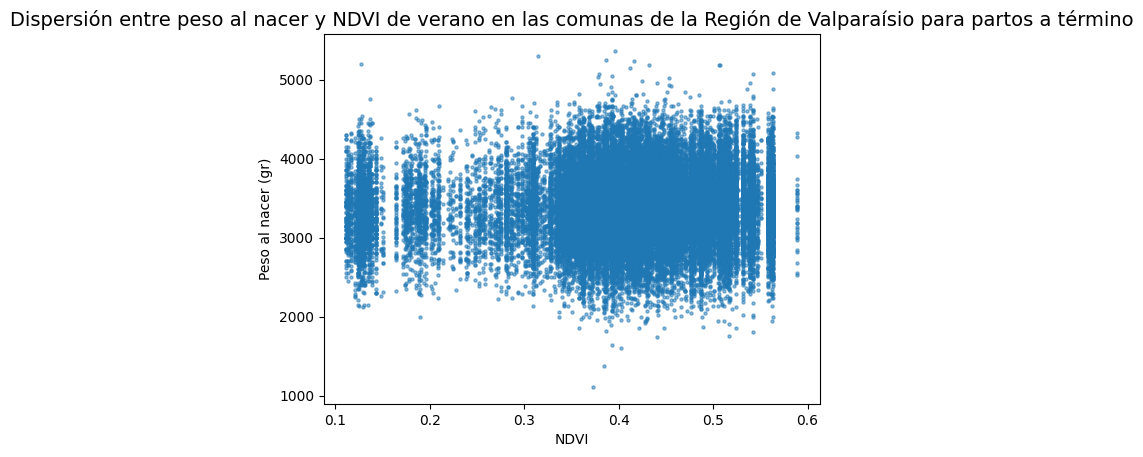

In [227]:
fig, ax = plt.subplots()
ax.scatter(df_nacimientos_termino_summer.NDVI_summer, df_nacimientos_termino_summer.tbw, alpha=0.5, s=5)
# Nombres de los ejes
ax.set_xlabel("NDVI")
ax.set_ylabel('Peso al nacer (gr)')
plt.title('Dispersión entre peso al nacer y NDVI de verano en las comunas de la Región de Valparaísio para partos a término', fontsize=14)
plt.show()

In [228]:
# Definimos categorías para NDVI para ayudar a la interpretación de los datos
bins = [-1, 0.1, 0.3, 0.6, 1]  # Ajustamos considerando el rango total de NDVI
labels = ["Muy Bajo", "Bajo", "Medio", "Alto"]
df_nacimientos_termino_summer["NDVI_categoria"] = pd.cut(df_nacimientos_termino_summer["NDVI_summer"], bins=bins, labels=labels)


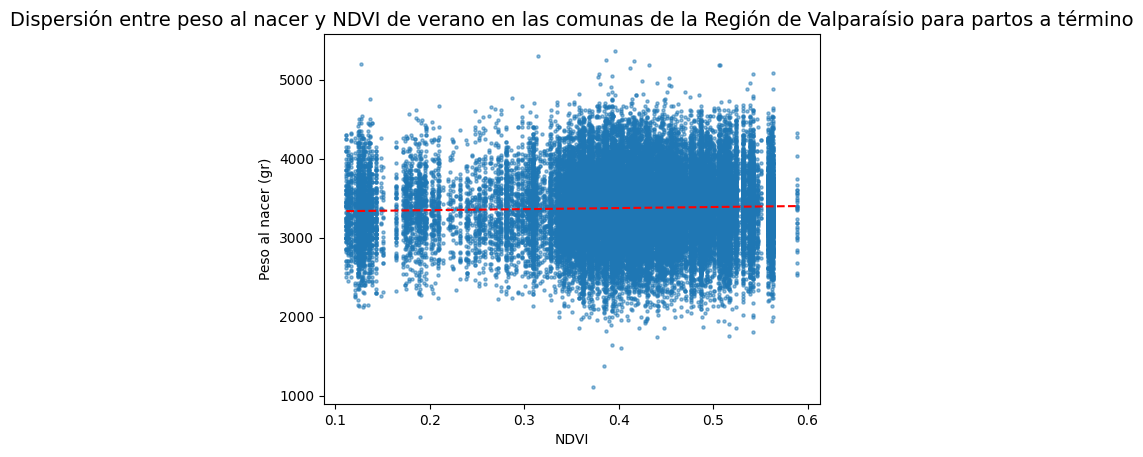

In [229]:
# Creamos el gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(df_nacimientos_termino_summer["NDVI_summer"], df_nacimientos_termino_summer["tbw"], alpha=0.5, s=5)

# Línea de tendencia
df_sorted = df_nacimientos_termino_summer.sort_values("NDVI_summer")  # Ordenamos los datos
z = np.polyfit(df_sorted["NDVI_summer"], df_sorted["tbw"], 1)  # Ajuste lineal
p = np.poly1d(z)
ax.plot(df_sorted["NDVI_summer"], p(df_sorted["NDVI_summer"]), "r--")  # Línea roja punteada

ax.set_xlabel("NDVI")
ax.set_ylabel("Peso al nacer (gr)")
plt.title('Dispersión entre peso al nacer y NDVI de verano en las comunas de la Región de Valparaísio para partos a término', fontsize=14)
plt.show()

In [230]:
# Calcular el coeficiente de correlación de Pearson
correlacion = df_nacimientos_termino_summer["NDVI_summer"].corr(df_nacimientos_termino_summer["tbw"])
print(f"Coeficiente de correlación: {correlacion:.4f}")

# Hacemos una regresión lineal
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(
    df_nacimientos_termino_summer["NDVI_summer"], df_nacimientos_termino_summer["tbw"]
)
print(f"\nCon una regresión lineal se obtiene que por cada aumento de 0.1 en NDVI, el peso cambia en {slope * 0.1:.4f} gramos")


# Calcular la media del peso al nacer por categoría de NDVI
peso_promedio_por_categoria = df_nacimientos_termino_summer.groupby("NDVI_categoria")["tbw"].mean()
print("\nPeso promedio (gr) al nacer por categoría de NDVI:")
print(peso_promedio_por_categoria)

Coeficiente de correlación: 0.0297

Con una regresión lineal se obtiene que por cada aumento de 0.1 en NDVI, el peso cambia en 13.4020 gramos

Peso promedio (gr) al nacer por categoría de NDVI:
NDVI_categoria
Muy Bajo            NaN
Bajo        3339.969730
Medio       3378.356688
Alto                NaN
Name: tbw, dtype: float64


/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_1716/2655526368.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peso_promedio_por_categoria = df_nacimientos_termino_summer.groupby("NDVI_categoria")["tbw"].mean()


Que las categorías "Muy bajo" y "Alto" presentan valores nulos significa que no hay comunas que registren esos valores

##### Invierno

In [231]:
# Creamos DataFrame con nacimientos en verano
df_nacimientos_termino_winter = df_nacimientos_termino[
    df_nacimientos_termino['estacion_tercer_trimestre'].str.startswith(("Invierno"))
]

Cruzamos los nacimientos a término en verano con df_summer_valparaiso_sovi

In [232]:
# Los nombres de las comunas vienen distintos
from unidecode import unidecode
df_winter_valparaiso_sovi['NOM_COM'] = df_winter_valparaiso_sovi['NOM_COM'].apply(lambda x: unidecode(x))

# Primero, solo con las columnas necesarias de df_summer_valparaiso_sovi
df_nacimientos_termino_winter = df_nacimientos_termino_winter.merge(
    df_winter_valparaiso_sovi[['NOM_COM', 'COD_COMUNA', 'sovi', 'vulnerablidad']], 
    on="NOM_COM", 
    how="left"
)

In [233]:
# Crear un diccionario con los valores NDVI por comuna. Es un diccionario donde la llave es NOM_COM
# y el valor es un diccionario que tiene como llaves las columnas AÑO_NDVI y sus valores respectivos
ndvi_dict = df_winter_valparaiso_sovi.set_index("NOM_COM").filter(like="_NDVI").to_dict(orient="index")

# Asignar el NDVI correspondiente a su year_nac
df_nacimientos_termino_winter["NDVI_winter"] = df_nacimientos_termino_winter.apply(
    lambda row: ndvi_dict[row["NOM_COM"]].get(f"{int(row['year_nac'])}_NDVI", None)
    if row["NOM_COM"] in ndvi_dict else None,
    axis=1
)

In [234]:
df_nacimientos_termino_winter.head()

id   com     NOM_COM  reg    name_reg  weeks   date_nac  day_nac  \
0   80817  5501    Quillota    5  Valparaiso     39 2009-09-18       18   
1  100184  5602   Algarrobo    5  Valparaiso     37 2008-08-16       16   
2  109792  5101  Valparaiso    5  Valparaiso     37 2008-08-13       13   
3  128600  5101  Valparaiso    5  Valparaiso     40 2008-08-30       30   
4  187620  5503    Hijuelas    5  Valparaiso     38 2008-09-11       11   

   month_nac  year_nac date_week1  year_week1  month_week1     ym_week1  \
0          9      2009 2008-12-26        2008           12  2008.916667   
1          8      2008 2007-12-08        2007           12  2007.916667   
2          8      2008 2007-12-05        2007           12  2007.916667   
3          8      2008 2007-12-01        2007           12  2007.916667   
4          9      2008 2007-12-27        2007           12  2007.916667   

  date_start_week_gest date_ends_week_gest   sex   tbw  size age_group_mom  \
0           2008-12-26          2009-09-18   Boy  3460  50.0         40-49   
1           2007-12-08          2008-08-16  Girl  2260  45.0         30-39   
2           2007-12-05          2008-08-13  Girl  3620  48.0          <=20   
3           2007-12-01          2008-08-30   Boy  2580  47.0         30-39   
4           2007-12-27          2008-09-11  Girl  3384  48.0         30-39   

  educ_group_mom job_group_mom age_group_dad educ_group_dad job_group_dad  \
0      Secondary      Employed       Unknown        Unknown       Unknown   
1      Secondary   Not working         40-49      Secondary      Employed   
2        Primary   Not working         30-39        Primary      Employed   
3        Primary      Employed       Unknown        Unknown       Unknown   
4      Secondary      Employed         30-39      Secondary      Employed   

   birth_preterm  birth_very_preterm  birth_moderately_preterm  \
0              0                   0                         0   
1              0                   0                         0   
2              0                   0                         0   
3              0                   0                         0   
4              0                   0                         0   

   birth_late_preterm  birth_term  birth_posterm semana_tercer_trimestre  \
0                   0           1              0              2009-07-03   
1                   0           1              0              2008-06-14   
2                   0           1              0              2008-06-11   
3                   0           1              0              2008-06-07   
4                   0           1              0              2008-07-03   

  estacion_tercer_trimestre  COD_COMUNA       sovi vulnerablidad  NDVI_winter  
0                  Invierno      5501.0  -5.758358    Medio-baja     0.620997  
1                  Invierno      5602.0  -9.506737    Medio-baja     0.628647  
2                  Invierno      5101.0 -10.579356    Medio-baja     0.624410  
3                  Invierno      5101.0 -10.579356    Medio-baja     0.624410  
4                  Invierno      5503.0   0.342760    Medio-alta     0.604045

Vemos si hay filas inválidas, probablemente porque uno de los DataFame no tenía esa comuna

In [235]:
filas_invalidas = df_nacimientos_termino_winter[
    df_nacimientos_termino_winter[['NDVI_winter']].isna().any(axis=1)
]
filas_invalidas.groupby("NOM_COM").size()

NOM_COM
Isla de Pascua    230
Juan Fernandez     22
dtype: int64

Eliminamos las filas inválidas

In [236]:
df_nacimientos_termino_winter = df_nacimientos_termino_winter.dropna(subset=["NDVI_winter"])

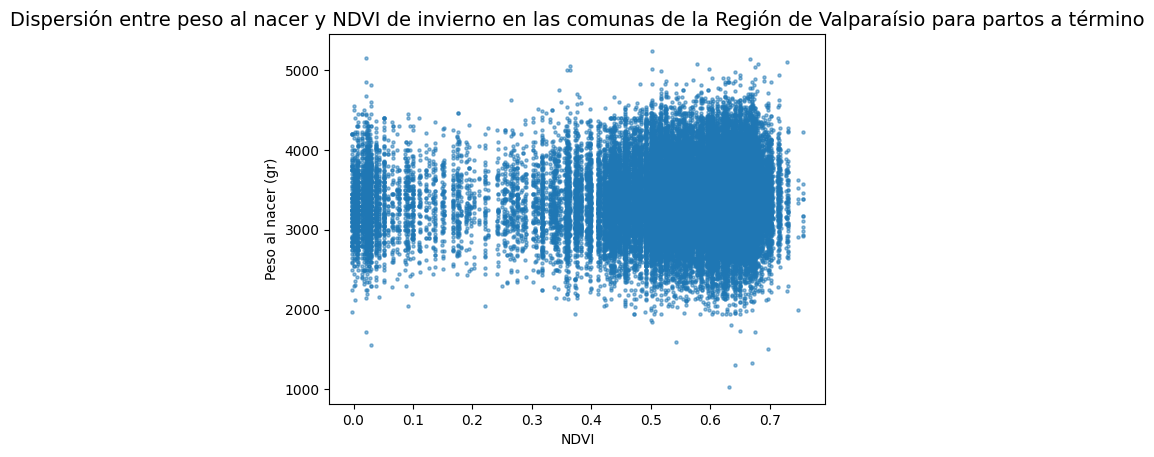

In [237]:
fig, ax = plt.subplots()
ax.scatter(df_nacimientos_termino_winter.NDVI_winter, df_nacimientos_termino_winter.tbw, alpha=0.5, s=5)
# Nombres de los ejes
ax.set_xlabel("NDVI")
ax.set_ylabel('Peso al nacer (gr)')
plt.title('Dispersión entre peso al nacer y NDVI de invierno en las comunas de la Región de Valparaísio para partos a término', fontsize=14)
plt.show()

In [238]:
# Definimos categorías para NDVI para ayudar a la interpretación de los datos
bins = [-1, 0.1, 0.3, 0.6, 1]  # Ajustamos considerando el rango total de NDVI
labels = ["Muy Bajo", "Bajo", "Medio", "Alto"]
df_nacimientos_termino_winter["NDVI_categoria"] = pd.cut(df_nacimientos_termino_winter["NDVI_winter"], bins=bins, labels=labels)

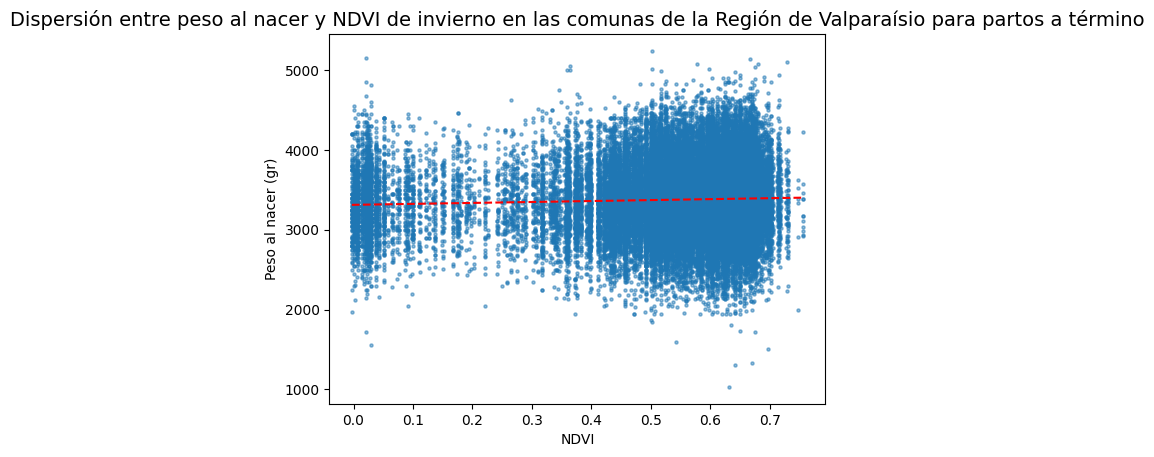

In [239]:
# Creamos el gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(df_nacimientos_termino_winter["NDVI_winter"], df_nacimientos_termino_winter["tbw"], alpha=0.5, s=5)

# Línea de tendencia
df_sorted = df_nacimientos_termino_winter.sort_values("NDVI_winter")  # Ordenamos los datos
z = np.polyfit(df_sorted["NDVI_winter"], df_sorted["tbw"], 1)  # Ajuste lineal
p = np.poly1d(z)
ax.plot(df_sorted["NDVI_winter"], p(df_sorted["NDVI_winter"]), "r--")  # Línea roja punteada

ax.set_xlabel("NDVI")
ax.set_ylabel("Peso al nacer (gr)")
plt.title('Dispersión entre peso al nacer y NDVI de invierno en las comunas de la Región de Valparaísio para partos a término', fontsize=14)
plt.show()

In [240]:
# Calcular el coeficiente de correlación de Pearson
correlacion = df_nacimientos_termino_winter["NDVI_winter"].corr(df_nacimientos_termino_winter["tbw"])
print(f"Coeficiente de correlación NDVI - Peso al nacer: {correlacion:.4f}")

# Hacemos una regresión lineal
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(
    df_nacimientos_termino_winter["NDVI_winter"], df_nacimientos_termino_winter["tbw"]
)
print(f"\nCon una regresión lineal se obtiene que por cada aumento de 0.1 en NDVI, el peso cambia en {slope * 0.1:.4f} gramos")

# Calcular la media del peso al nacer por categoría de NDVI
peso_promedio_por_categoria = df_nacimientos_termino_winter.groupby("NDVI_categoria")["tbw"].mean()
print("\nPeso promedio (gr) al nacer por categoría de NDVI:")
print(peso_promedio_por_categoria)

Coeficiente de correlación NDVI - Peso al nacer: 0.0411

Con una regresión lineal se obtiene que por cada aumento de 0.1 en NDVI, el peso cambia en 11.8816 gramos

Peso promedio (gr) al nacer por categoría de NDVI:
NDVI_categoria
Muy Bajo    3330.205677
Bajo        3336.093264
Medio       3370.038974
Alto        3391.515610
Name: tbw, dtype: float64


/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_1716/2550287308.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peso_promedio_por_categoria = df_nacimientos_termino_winter.groupby("NDVI_categoria")["tbw"].mean()


##### Verano + Invierno

In [241]:
# Eliminamos posibles espacios en blanco al inicio y al final de los nombres de las comunas
# Esto evita problemas de coincidencia al hacer el merge entre DataFrames
df_summer_valparaiso_sovi["NOM_COM"] = df_summer_valparaiso_sovi["NOM_COM"].str.strip()
df_winter_valparaiso_sovi["NOM_COM"] = df_winter_valparaiso_sovi["NOM_COM"].str.strip()
df_nacimientos_termino_summer["NOM_COM"] = df_nacimientos_termino_summer["NOM_COM"].str.strip()
df_nacimientos_termino_winter["NOM_COM"] = df_nacimientos_termino_winter["NOM_COM"].str.strip()

In [242]:
df_nacimientos_termino_summer = df_nacimientos_termino_summer.rename(columns={"NDVI_summer": "NDVI"})
df_nacimientos_termino_winter = df_nacimientos_termino_winter.rename(columns={"NDVI_winter": "NDVI"})

# Concatenar ambos DataFrames
df_nacimientos_termino_total = pd.concat([df_nacimientos_termino_summer, df_nacimientos_termino_winter], ignore_index=True)


Repetimos los gráficos y cálculos con este DataFrame

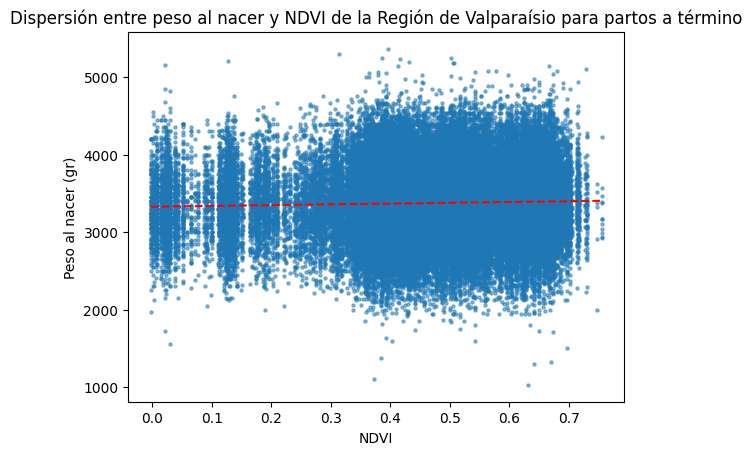

In [243]:
# Definimos categorías para NDVI para ayudar a la interpretación de los datos
bins = [-1, 0.1, 0.3, 0.6, 1]  # Ajustamos considerando el rango total de NDVI
labels = ["Muy Bajo", "Bajo", "Medio", "Alto"]
df_nacimientos_termino_total["NDVI_categoria"] = pd.cut(df_nacimientos_termino_total["NDVI"], bins=bins, labels=labels)

# Creamos el gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(df_nacimientos_termino_total["NDVI"], df_nacimientos_termino_total["tbw"], alpha=0.5, s=5)

# Línea de tendencia
df_sorted = df_nacimientos_termino_total.sort_values("NDVI")  # Ordenamos los datos
z = np.polyfit(df_sorted["NDVI"], df_sorted["tbw"], 1)  # Ajuste lineal
p = np.poly1d(z)
ax.plot(df_sorted["NDVI"], p(df_sorted["NDVI"]), "r--")  # Línea roja punteada

ax.set_xlabel("NDVI")
ax.set_ylabel("Peso al nacer (gr)")
plt.title("Dispersión entre peso al nacer y NDVI de la Región de Valparaísio para partos a término")
plt.show()

In [244]:
# Calcular el coeficiente de correlación de Pearson
correlacion = df_nacimientos_termino_total["NDVI"].corr(df_nacimientos_termino_total["tbw"])
print(f"Coeficiente de correlación NDVI - Peso al nacer: {correlacion:.4f}")

# Hacemos una regresión lineal
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(
    df_nacimientos_termino_total["NDVI"], df_nacimientos_termino_total["tbw"]
)
print(f"\nCon una regresión lineal se obtiene que por cada aumento de 0.1 en NDVI, el peso cambia en {slope * 0.1:.4f} gramos")

# Calcular la media del peso al nacer por categoría de NDVI
peso_promedio_por_categoria = df_nacimientos_termino_total.groupby("NDVI_categoria")["tbw"].mean()
print("\nPeso promedio (gr) al nacer por categoría de NDVI:")
print(peso_promedio_por_categoria)

Coeficiente de correlación NDVI - Peso al nacer: 0.0330

Con una regresión lineal se obtiene que por cada aumento de 0.1 en NDVI, el peso cambia en 10.1097 gramos

Peso promedio (gr) al nacer por categoría de NDVI:
NDVI_categoria
Muy Bajo    3330.205677
Bajo        3339.288472
Medio       3375.365127
Alto        3391.515610
Name: tbw, dtype: float64


/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_1716/4281239541.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peso_promedio_por_categoria = df_nacimientos_termino_total.groupby("NDVI_categoria")["tbw"].mean()
